# Обучение с учителем: качество модели

GitHub репощиторий проекта: https://github.com/Ergwath/ya-practicum-supervised-learning.git

## Описание проекта

### Основная Цель
Требуется разработать решение, которое позволит персонализировать предложения постоянным клиентам магазина "В один клик", чтобы увеличить их покупательскую активность.

### Задачи
1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.


### Подход к решению
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
  - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
  - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
  - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
  - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
  
Признаки собраны на диаграмме Исикавы:

<img src='https://pictures.s3.yandex.net/resources/image_1695485033.png'/>

### План проекта

1. [Загрузка данных](#Загрузка-данных)
2. [Предобработка данных](#Предобработка-данных)
3. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
4. [Объединение данных](#Объединение-таблиц)
5. [Проведение корреляционного анализа](#Корреляционный-анализ)
6. [Поиск лучшей модели для предсказания вероятности снижения покупательской активности](#Поиск-лучшей-модели-для-предсказания-вероятности-снижения-покупательской-активности)
7. [Анализ важности признаков](#Анализ-важности-признаков)
8. [Сегментация покупателей](#Сегментация-покупателей)
9. [Общий вывод](#Общий-вывод)

***

## Реализация проекта

<a id='Загрузка-данных'></a>

### Загрузка данных

**В наше распоряжение предоставлено 4 набора данных:**
- ``market_file.csv`` с данными
  - о поведении покупателей на сайте
  - о коммуникациях с покупателем
  - о продуктовом поведении покупателя
- ``market_money.csv`` с данными о том, сколько денег покупатель потратил за период взаимодействия с сайтом
- ``market_time.csv`` с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода
- ``money.csv`` с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю


Первые тра набора данных следует использовать для поиска модели предсказания вероятности снижения покупательской активности.
Последний (четвертый) набор данных необходим для решения задачи сегментации.

***

**Ниже представлены описания структуры каждого набора данных.**

<details class="alert alert-block alert-info">
    <summary><strong>> Структура файла <code>market_file.csv</code></strong></summary>
    <ul>
        <li><code>id</code> — номер покупателя в корпоративной базе данных.</li>    
        <li><code>Покупательская активность</code> — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».</li>
        <li><code>Тип сервиса</code> — уровень сервиса, например «премиум» и «стандарт».</li>
        <li><code>Разрешить сообщать</code> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.</li>
        <li><code>Маркет_актив_6_мес</code> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.</li>
        <li><code>Маркет_актив_тек_мес</code> — количество маркетинговых коммуникаций в текущем месяце.</li>
        <li><code>Длительность</code> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.</li>
        <li><code>Акционные_покупки</code> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.</li>
        <li><code>Популярная_категория</code> — самая популярная категория товаров у покупателя за последние 6 месяцев.</li>
        <li><code>Средний_просмотр_категорий_за_визит</code> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.</li>
        <li><code>Неоплаченные_продукты_штук_квартал</code> — общее число неоплаченных товаров в корзине за последние 3 месяца.</li>
        <li><code>Ошибка_сервиса</code> — число сбоев, которые коснулись покупателя во время посещения сайта.</li>
        <li><code>Страниц_за_визит</code> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.</li>
    </ul>
</details>

<br/>

<details class="alert alert-block alert-info">
    <summary><strong>> Структура файла <code>market_money.csv</code></strong></summary>
    <ul>
        <li><code>id</code> — номер покупателя в корпоративной базе данных.</li>    
        <li><code>Период</code> — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.</li>
        <li><code>Выручка</code> — сумма выручки за период.</li>
    </ul>
</details>

<br/>

<details class="alert alert-block alert-info">
    <summary><strong>> Структура файла <code>market_time.csv</code></strong></summary>
    <ul>
        <li><code>id</code> — номер покупателя в корпоративной базе данных.</li>    
        <li><code>Период</code> — название периода, во время которого зафиксировано общее время.</li>
        <li><code>минут</code> — значение времени, проведённого на сайте, в минутах.</li>
    </ul>
</details>

<br/>

<details class="alert alert-block alert-info">
    <summary><strong>> Структура файла <code>money.csv</code></strong></summary>
    <ul>
        <li><code>id</code> — номер покупателя в корпоративной базе данных.</li>    
        <li><code>Прибыль</code> — значение прибыли.</li>
    </ul>
</details>

#### Импортируем необходимые библиотеки

In [1]:
# апргрейд библиотеки matplotlib, чтобы избежать
# ошибки "TypeError: set_ticks() got an unexpected keyword argument 'labels'"
!pip install --upgrade matplotlib==3.5.0 -q

In [2]:
# Импортируем библиотеку Phik для расчета корреляции признаков
!pip install phik -q

In [3]:
# Устанавливаем библиотеку Shap для интерпретации вклада признаков в работу модели
!pip install shap -q

In [ ]:
from warnings import simplefilter

# Основные библиотеки для загрузки, обработки и визуализации
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки машинного обучения
# класс pipeline
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

# классы для подготовки данных к МО
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    LabelEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.compose import ColumnTransformer

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score

# импортируем библиотеку shap
import shap

import phik

In [ ]:
# Отключаем предупреждения о будущих проблемах
simplefilter(action='ignore', category=FutureWarning)

# сразу применим настройки для улучшения читаемости выводимых таблиц
# всегда показываем все столбцы таблиц
pd.set_option('display.max_columns', None)

# Объявим константы, которые будем использовать на протяжении всего процесса МО
RANDOM_STATE = 42
TEST_SIZE = 0.25

#### Определяем вспомогательные функции для проекта

In [ ]:
# Функция для вывода основных данных о датасетах
def describe_dataframe(df: pd.DataFrame) -> None:
    """
    Выводит на экран основную информацию о датафрейме:
      - первые 5 строк набора
      - результат метода info
      - результат метода describe
      - количество пропусков в конкретных полях, если есть
      - количество полных дубликатов
    """
    
    # выводим первые 5 строк
    print("Содержимое первых 5 строк набора данных:")
    display(df.head())
    print("\n")
    
    # выводим информацию о датафрейме
    print("Общая информация о наборе данных:")
    display(df.info())
    print("\n")
    
    # выводим описательные стратистики количественных полей
    print("Статистики количественных полей:")
    display(df.describe())
    print("\n")
    
    # выводим информацию о пропусках в полях датафрейма
    print("Пропуски данных в полях набора:")
    missing = (pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean().round(2)})
           .style.background_gradient(cmap='coolwarm'))
    display(missing)
    print("\n")
    
    # выводим количество полных дубликатов
    print('Количество полных дубликатов в датафрейме:', df.duplicated().sum())

In [ ]:
# Подготовим функцию для вывода распределений количественных полей датасета
def histograms(df: pd.DataFrame, columns: list, table_name: str, figsize=(18,10)) -> None:
    """
    Функция для вывода графика с распределениями значений числовых полей набора данных Pandas.
    
    Аргументы:
    - df - pandas data frame
    - columns - список числовых полей для отрисовки на графиках
    - table_name - название таблицы для вывода в названии графика
    """

    # Гистограммы для набора данных data
    axes = df[columns].hist(figsize=figsize)

    # переведем двумерный ndarray в одномерный для простоты перебора
    axes = axes.flatten()

    for i in range(len(axes)):
        axes[i].set_title(f'Распределение значений в поле\n"{axes[i].title.get_text()}"', fontsize=14)
        axes[i].set_ylabel('Количество значений', fontsize=12)
        axes[i].set_xlabel('Значения поля', fontsize=12)

    plt.suptitle(f'Графики распределения количественных значений в таблице "{table_name}"',
                fontsize=15
                )
        
    plt.show()

In [ ]:
def countplots(df: pd.DataFrame, columns: list, table_name: str, figsize=(18,10)) -> None:
    """
    Функция для вывода графика с частотами встречаемости значений дискретных числовых полей набора данных Pandas.
    
    Аргументы:
    - df - pandas data frame
    - columns - список дискретных полей для отрисовки на графиках
    - table_name - название таблицы для вывода в названии графика
    """
    
    # рассчитаем количество строк для отрисовки 2 графиков в строке
    row_num = int(len(columns) // 2 + 1 if len(columns) % 2 else len(columns) / 2)

    fig, axes = plt.subplots(
        row_num, 2, 
        figsize=figsize
    )
    
    # переведем двумерный ndarray в одномерный для простоты перебора
    axes = axes.flatten()
    
    # непосредственно отрисовываем
    for i, column in enumerate(columns):
        sns.countplot(data=df[columns], x=column, ax=axes[i], color='C0')
        axes[i].set_title(f'Частотность значений параметра {column}')
        axes[i].set_ylabel('Количество')
        axes[i].set_xlabel('Значения')
    
    # Скроем все неиспользуемые подграфики
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(f'Графики частотности дискретных значений в таблице "{table_name}"',
                fontsize=15
                )
        
    plt.show()

In [ ]:
# Подготовим функцию отображения графиков распределения категориальных значений
def categories_charts(data: pd.DataFrame, columns: list, title=None, figsize=(18,16)):
    """
    Функция для вывода графика с распределениями значений категориального поля набора данных Pandas.
    
    Аргументы:
    - data - датафрейм pandas
    - columns - список категориальных полей для отрисовки на графиках
    - title - название графика
    - figsize - размер области для отрисовки
    
    """
    
    # рассчитаем количество строк для отрисовки 2 графиков в строке
    row_num = int(len(columns) // 2 + 1 if len(columns) % 2 else len(columns) / 2)

    fig, axes = plt.subplots(
        row_num, 2, 
        figsize=figsize
    )
    
    # сделаем плоский массив подграфиков для более простой итерации по нему
    axes = axes.flatten()
    
    # непосредственно отрисовываем
    for i, column in enumerate(columns):
        ax = axes[i]
        # расчет частоты встречаемости каждого значения в параметре
        category_dist = data[column].value_counts()
        ax.bar(
            category_dist.index,
            category_dist
        )
        ax.set_xlabel(column)
        ax.set_ylabel('Количество значений')
        if len(category_dist.index) > 4:
            ax.tick_params("x", rotation=90)
    
    # Скроем все неиспользуемые подграфики
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
        
    plt.suptitle(
        title,
        fontsize=15,
        y=0.95
    )
    
    plt.show()   
    

In [ ]:
# Подготовим универсальную функцию для отрисовки гистограммы и box plot
def boxplot_hist(data, xlabel=None, title=None, figsize=(18,10), bins=None):
    """
    Функция для одновременной отрисовки графиков boxplot и hitsogram друг под дружкой
        и общей осью - X.
    Сверху - boxplot, снизу - histogram.
    
    Аргументы:
    - data - Series из Pandas
    - xlabel - подпись для оси X
    - title - название графика
    - figsize - размер области для отрисовки
    - bins - количество бинов для гистограммы
    
    """
    
    fig, ax = plt.subplots(
        2, figsize=figsize, sharex=True,
        gridspec_kw={"height_ratios": (.3, .7)}  # выделяем 30% области boxplot'у
    )

    # отрисовываем boxplot
    ax[0].boxplot(data, vert=False)

    # удаляем границы графика, чтобы было визуально приятнее
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)

    # отрисовываем гистограмму
    ax[1].hist(data, bins=bins)
    ax[1].set_xlabel(xlabel,
                    fontsize=14)
    ax[1].set_ylabel('Количество значений',
                    fontsize=14)
    
    plt.suptitle(title, fontsize=15, y=0.9)
    
    # выводим графики
    plt.show()

#### Загружаем данные

In [ ]:
# Загружаем данные market_file.csv
try:
    market_file = pd.read_csv('./datasets/market_file.csv')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [ ]:
# Загружаем данные market_money.csv
try:
    market_money = pd.read_csv('./datasets/market_money.csv')
except:
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [ ]:
# Загружаем данные market_time.csv
try:
    market_time = pd.read_csv('./datasets/market_time.csv')
except:
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [ ]:
# Загружаем данные money.csv
try:
    money = pd.read_csv('./datasets/money.csv', sep=';', decimal=',')
except:
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')
    
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Загрузка прошла успешно.

Формат файла ``money.csv`` отличается от формата остальных файлов: разделитель полей - "точка с запятой", а десятичный разделитель - "запятая".

#### Знакомимся с данными

***

In [12]:
# Набор данных market_file
describe_dataframe(market_file)

Содержимое первых 5 строк набора данных:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2




Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  

None



Статистики количественных полей:


,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000




Пропуски данных в полях набора:


,Кол-во пропусков,Доля пропусков
id,0,0.000000
Покупательская активность,0,0.000000
Тип сервиса,0,0.000000
Разрешить сообщать,0,0.000000
Маркет_актив_6_мес,0,0.000000
Маркет_актив_тек_мес,0,0.000000
Длительность,0,0.000000
Акционные_покупки,0,0.000000
Популярная_категория,0,0.000000
Средний_просмотр_категорий_за_визит,0,0.000000




Количество полных дубликатов в датафрейме: 0


Быстрый анализ набора ``market_file`` выявил следующее:
- В наборе ровно 1300 наблюдений;
- Названия полей сформированы по-разному, для удобства, мы оставим русские наименования, но приведем все к нижнему регистру и все пробелы заменим на нижнее подчеркивание;
- Ни в одном поле нет явных пропусков;
- Содержимое категорийных полей (строковых) необходимо обязательно проверить на наличие неявных дубликатов: в поле ``Тип сервиса`` уже видно некорректное значение "стандар**тт**";
- При загрузке данных все типы полей были корректно распознаны автоматически - приведение типов не нужно;
- Статистики числовых полей выглядят правдоподобно - нет сильно выбивающихся значений (слишком или нереально высоких, невозможных);

***

In [13]:
# Набор данных market_money
describe_dataframe(market_money)

Содержимое первых 5 строк набора данных:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6




Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None



Статистики количественных полей:


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000




Пропуски данных в полях набора:


,Кол-во пропусков,Доля пропусков
id,0,0.000000
Период,0,0.000000
Выручка,0,0.000000




Количество полных дубликатов в датафрейме: 0


Результат знакомства с набором ``market_money``:
- В наборе ровно 3900 наблюдений, что ровно в 3 раза больше, чем записей с пользователями интернет-магазина. На каждого пользователя по три записи. Статистики поля ``id`` в данном наборе совпадают со статистиками поля ``id`` в наборе ``market_file``;
- Названия полей необходимо будет перевести в нижний регистр для удобства;
- Ни в одном из полей нет явных пропусков;
- В поле ``Выручка`` явно есть выбросы, но вероятнее всего, эти значения реальны, т.к. такие "киты" встречаются;
- На всякий случай потребуется проверить значения поля ``Период`` на неявные дубликаты;

***

In [14]:
# Набор данных market_time
describe_dataframe(market_time)

Содержимое первых 5 строк набора данных:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13




Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None



Статистики количественных полей:


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000




Пропуски данных в полях набора:


,Кол-во пропусков,Доля пропусков
id,0,0.000000
Период,0,0.000000
минут,0,0.000000




Количество полных дубликатов в датафрейме: 0


Результат знакомства с данными ``market_time``:
- В наборе ровно 2600 наблюдений, что в 2 раза больше, чем в наборе с пользователями. Статистики поля ``id`` полностью совпадают со статистиками в двух предыдущих наборах;
- Названия полей потребуется привести к нижнему регистру;
- Значения поля ``Период`` потребуется исправить, т.к. уже в первых 5 записях есть опечатки: "предыд**ц**щий_месяц";
- В наборе нет явных пропусков и полных дубликатов;
- Судя по статистикам поля ``минут``, его значения вполне правдоподобные;
- Типы данных были автоматически корректно распознаны;

***

In [15]:
# Набор данных money
describe_dataframe(money)

Содержимое первых 5 строк набора данных:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21




Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None



Статистики количественных полей:


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000




Пропуски данных в полях набора:


,Кол-во пропусков,Доля пропусков
id,0,0.000000
Прибыль,0,0.000000




Количество полных дубликатов в датафрейме: 0


Результат знакомства с набором ``money``:
- В наборе 1300 наблюдений. Должно быть по 1 наблюдению на каждого пользователя;
- Отсутствуют полные дубли и явные пропуски;
- Названия полей требуется привести к нижнему регистру;
- Не очень понятно в каких единицах измеряется среднемесячная прибыль с каждого клиента. В условиях задачи это не указано. Но судя по разнице в димпазонах значений выручки и прибыли, прибыль - это процентное значение от выручки;

#### Итоги загрузки данных

Нами было успешно загружено все 4 исходных набора данных.

Только один набор данных - ``money.csv`` - отличается по формату. В нем в качестве разделителей значений используется ";" вместо ",", а в качестве десятичного разделителя - "," вместо ".".


Типы данных во всех наборах были корректно распознаны автоматически и не требуют приведения.

В результате первого знакомства с данными было выявлено следующее:
- Вероятнее всего все наборы данных полноценные: количество записей в последних трех наборах кратно количеству записей о пользователях в наборе ``market_file``;
- Ни в одном из наборов нет полных дубликатов и явных пропусков;
- Судя по статистикам числовых значений, в наборах не встречаются подозрительно большие, малые или невозможные величины;

Потребуется провести следующие проверки и исправления в рамках подготовки данных:
- Привести названия всех полей к нижнему регистру и заменить в них пробелы на знак "_";
- Проверить все категорийные поля (строковые) на неявные дубли и исправить;


**Также важное замечание:** в условии задачи нет информации о том в каких единицах измеряется прибыль.

Как известно ``Прибыль = Выручка - Расходы``, т.е. должна измеряться в валюте выручки.

Однако, в наборе ``money`` значения прибыли находятся в диапазоне от 0.86 до 7.43 при среднем значении выручки около 5 тысяч. Таким образом среднемесячная прибыль в несколько рублей выглядит нереальной. Поэтому примем, что прибыль в файле money.csv указана в процентах от выручки.

<a id='Предобработка-данных'></a>

### Предобработка данных

#### Приведение названий колонок к единому виду

Как было обнаружено на этапе загрузки и первичного знакомства с данными, названия колонок во всех наборах данных не консистентны.

Мы исправим это: оставим названия кириллическими, но приведем все символы к нижнему регистру и заменим пробелы в названиях на нижние подчеркивания.

In [16]:
# изменяем
market_file.columns = [ column.lower().replace(' ', '_') for column in market_file.columns ]

# проверяем
market_file.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [17]:
# изменяем
market_money.columns = [ column.lower().replace(' ', '_') for column in market_money.columns ]

# проверяем
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [18]:
# изменяем
market_time.columns = [ column.lower().replace(' ', '_') for column in market_time.columns ]

# проверяем
market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

In [19]:
# изменяем
money.columns = [ column.lower().replace(' ', '_') for column in money.columns ]

# проверяем
money.columns

Index(['id', 'прибыль'], dtype='object')

#### Проверка на неявные дубли в категорийных полях

Начнем с самого большого массива данных - ``market_file``

In [20]:
# Выведем все уникальные значения каждого поля для проверки.
market_file_category_columns = [
    'покупательская_активность',
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория'
]

for column in market_file_category_columns:
    print(f"\nУникальные значения в колонке {column}:")
    print(list(market_file[column].unique()))


Уникальные значения в колонке покупательская_активность:
['Снизилась', 'Прежний уровень']

Уникальные значения в колонке тип_сервиса:
['премиум', 'стандартт', 'стандарт']

Уникальные значения в колонке разрешить_сообщать:
['да', 'нет']

Уникальные значения в колонке популярная_категория:
['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']


Явные проблемы присутствуют только в колонке ``тип_сервиса``.

Заменим значение "стандартт" на "стандарт".

In [21]:
# Исправляем значения в колонке "тип_сервиса"
market_file['тип_сервиса'] = market_file['тип_сервиса'].where(market_file['тип_сервиса'] != 'стандартт', 'стандарт')

list(market_file['тип_сервиса'].unique())

['премиум', 'стандарт']

Успешно избавились от неявных дублей.

Теперь проверим значения в поле "период" набора ``market_money``

In [22]:
print(list(market_money["период"].unique()))

['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


Здесь все ок. 

Следующий набор - ``market_time`` с таким же полем.

In [23]:
print(list(market_time["период"].unique()))

['текущий_месяц', 'предыдцщий_месяц']


Неявных дублей нет, но опечатку все-таки следует исправить для читаемости данных.

In [24]:
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц','предыдущий_месяц')

print(list(market_time["период"].unique()))

['текущий_месяц', 'предыдущий_месяц']


Все неявные дубли и опечатки теперь исправлены.

#### Проверка на полные дубли

В теории, полных дублей быть не должно даже после исправления записей с неявными дубликатами в категорийных полях, но проверить все равно требуется.

Проверяем набор market_file, поскольку только в нем были обнаружены неявные дубликаты, в наборе market_time мы просто исправили написание.

In [25]:
print('Количество полных дубликатов в датафрейме market_file после исправления неявных дублей:', market_file.duplicated().sum())

Количество полных дубликатов в датафрейме market_file после исправления неявных дублей: 0


#### Итоги предобработки данных

Нам были предоставлены достаточно чистые исходные данные, которые не потребовали длительной предобработки.

Все же следующие исправления нам понадобилось сделать:

1. Привести наименования полей к единому виду - нижний регистр, подчеркивания в качестве разделителей слов
2. Исправить неявные дубликаты в некоторых категорийных полях:
  - в поле "тип_сервиса" набора ``market_file`` два написания одного и того же значения были приведены к одному: 'стандарт**т**' -> 'стандарт'
  - в поле "период" набора ``market_time`` была исправлена опечатка в значении 'предыд**ц**щий_месяц' -> 'предыдущий_месяц'

Возможно, подобные ошибки были допущены либо в скриптах выгрузки данных, либо в исходных данных системы интернет магазина. Необходимо проверить это, чтобы избежать подобных проблем в будущем.

<a id='Исследовательский-анализ-данных'></a>

### Исследовательский анализ данных

На данном этапе, кроме стандартного исследовательского анализа данных, нам предстоит отобрать только тех клиентов, у которых была покупательская активность все три месяца (данные представлены в наборе market_money).

Т.е. мы отберем в финальный набор только тех пользователей, у которых нет ни одной записи в market_money, где ``выручка`` == 0.

#### Данные набора ``market_file``

В наборе ``market_file`` присутствуют как числовые, так и категорийные признаки.

Также среди числовых есть дискретные признаки - признаки целочисленного типа, у которых совсем мало различных значений.

Разные типы признаков требуют разные типы диаграмм для анализа, поэтому мы разобьем данные из этого набора на 3 поднабора с признаками разных типов и будем их анализировать по отдельности.

##### Анализ непрерывных признаков

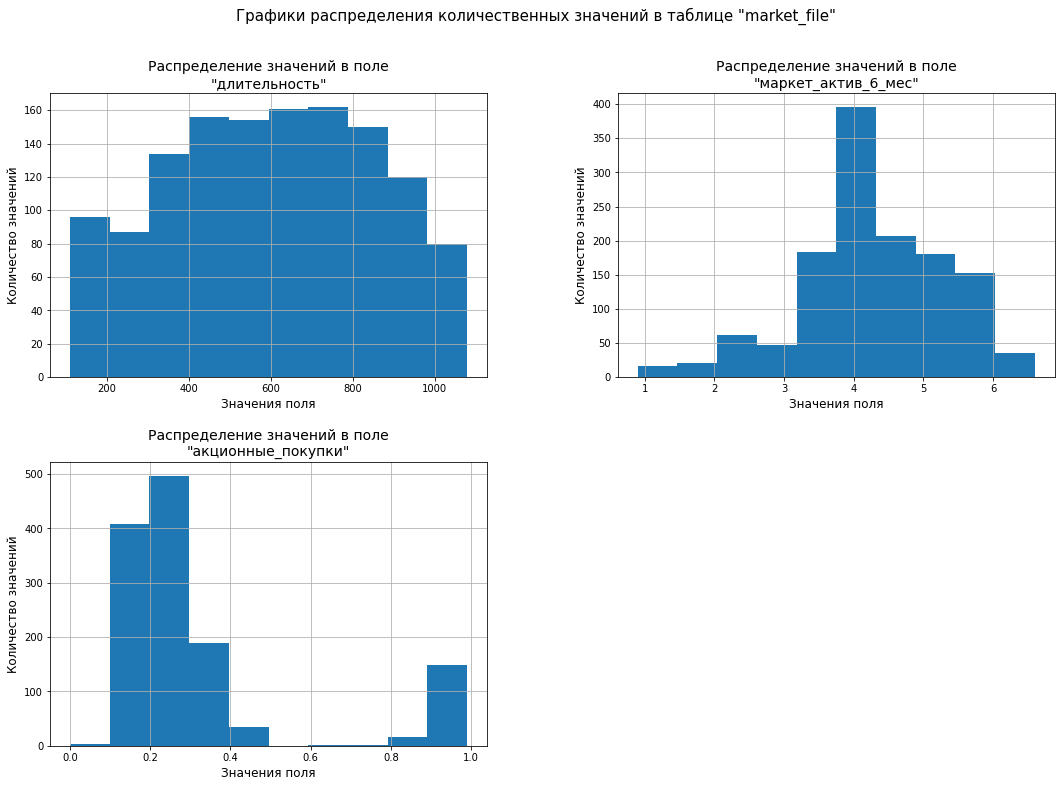

In [30]:
# Выведем гистограммы значений количественных полей в наборе market_file

# Признак "длительность" - целочисленный, но он очень близок к непрерывному, 
# т.к. вероятнее всего просто округлен из минут и секунд
# поэтому его лучше будет анализировать при помощи гистограммы
histograms(
    market_file, 
    ['длительность', 'маркет_актив_6_мес', 'акционные_покупки'], 
    'market_file', 
    (18,12)
)

На графиках распределений заметно следующее:
- распределение среднемесячного количества маркетинговых коммуникаций в поле ``маркет_актив_6_мес`` близко к нормальному, но 
- рапсределение значений в поле ``длительность`` - близко к нормальному
- распределение значений в поле ``акционные покупки`` - больше похоже на бимодальное, что говорит о том, что вероятнее всего пользователей можно разделить на разные категории, сгруппировав по вхождению значения в один из "горбов" распределения. Особенно учитывая, что эти "горбы" достаточно четко распределены. Одна категория пользователей покупает в основном акционные товары, а другая - не акционные.

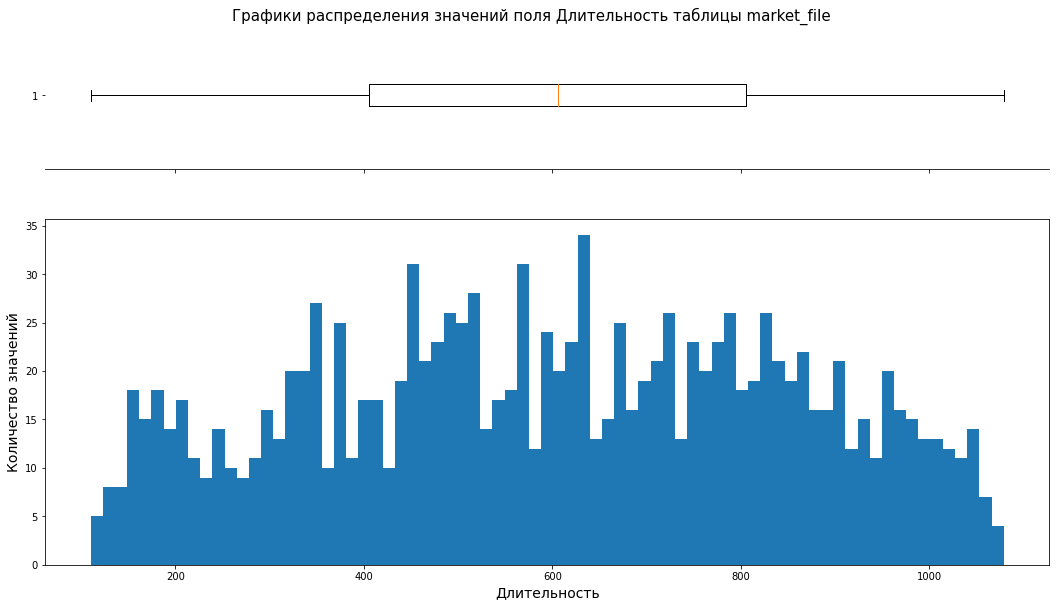

In [31]:
# Рассмотрим более близко распределение данных признака "длительность"
boxplot_hist(
    market_file['длительность'], 
    xlabel='Длительность', 
    title='Графики распределения значений поля Длительность таблицы market_file',
    bins=75
)

Распределение значений параметра Длительность действительно очень близко к нормальному. Выбросов нет.
***

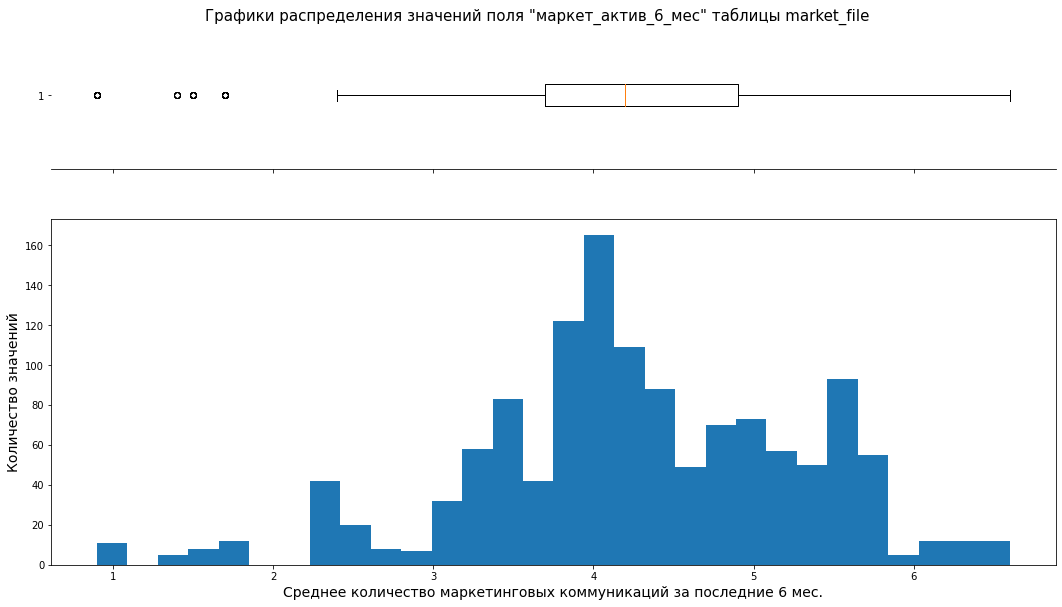

In [32]:
# Рассмотрим более близко распределение данных признака "маркет_актив_6_мес"
boxplot_hist(
    market_file['маркет_актив_6_мес'], 
    xlabel='Среднее количество маркетинговых коммуникаций за последние 6 мес.', 
    title='Графики распределения значений поля "маркет_актив_6_мес" таблицы market_file',
    bins=30
)

В целом распределение значений этого признака тоже нормальное, но есть несколько выбивающихся наблюдений, где количество маркетинговых коммуникаций за последние 6 месяцев меньше 2.

Не будем ничего делать с этим признаком, т.к. эти значения не экстремально далеко от основной массы наблюдений.
***

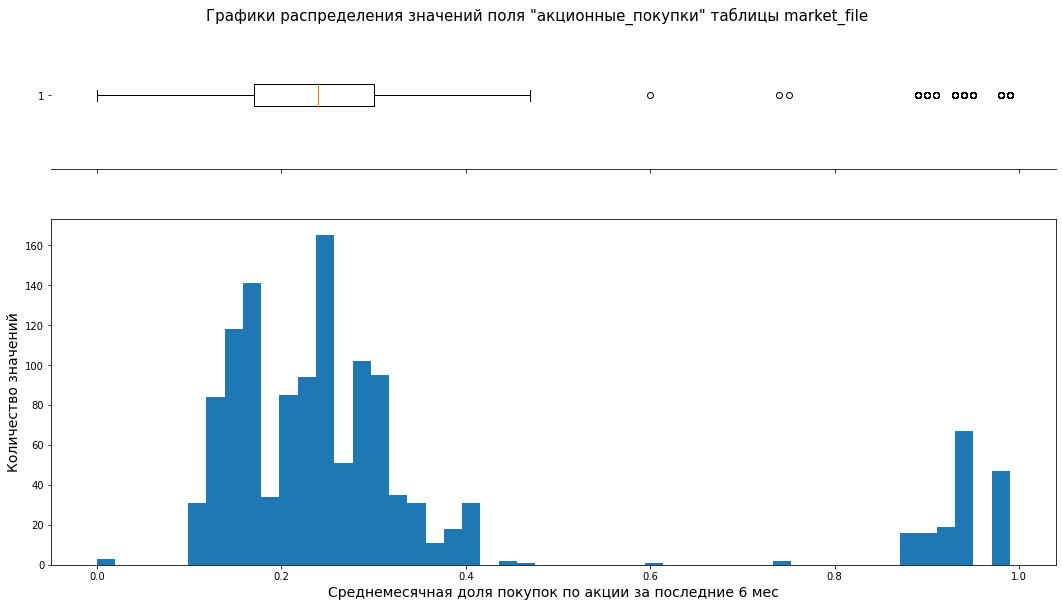

In [33]:
# Рассмотрим более близко распределение данных признака "акционные_покупки"
boxplot_hist(
    market_file['акционные_покупки'], 
    xlabel='Среднемесячная доля покупок по акции за последние 6 мес', 
    title='Графики распределения значений поля "акционные_покупки" таблицы market_file',
    bins=50
)

График boxplot выделил всех, кто почти все покупки совершил по акции, в выбросы.

На деле, здесь бимодальное распределение, но основная масса пользователей все же только ~20%-30% товаров приобретает по акции.

##### Анализ дискретных признаков

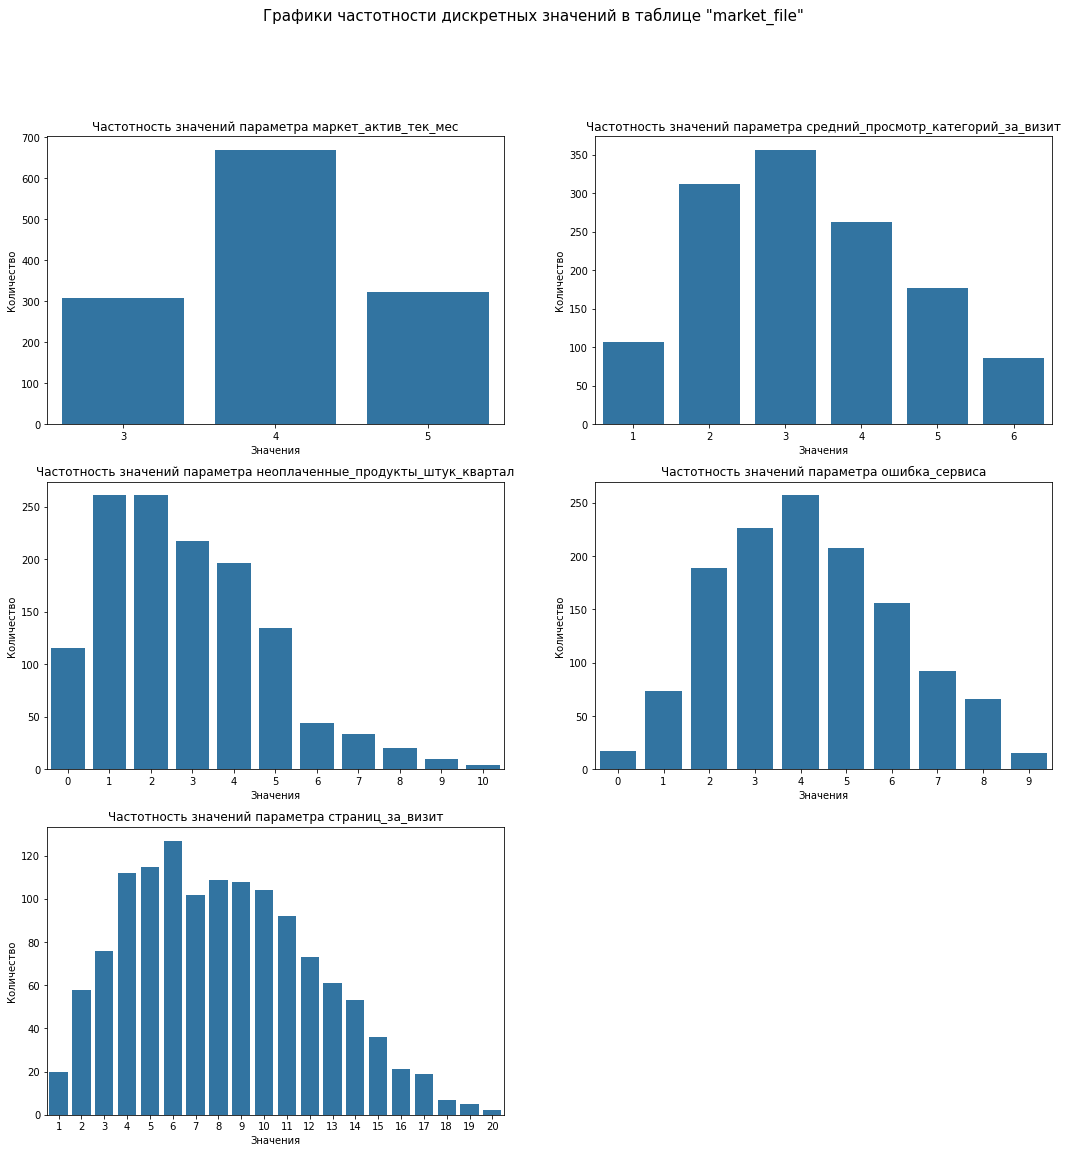

In [34]:
countplots(
    market_file, 
    [
        'маркет_актив_тек_мес', 
        'средний_просмотр_категорий_за_визит',
        'неоплаченные_продукты_штук_квартал',
        'ошибка_сервиса',
        'страниц_за_визит'
    ],
    'market_file', 
    (18,18)
)

На графиках распределений заметно следующее:
- распределение значений поля ``маркет_актив_тек_мес`` нальзя назвать нормальным, не смотря на его форму, поскольку это распределение всего 3х дискретных величин (3,4,5), чего, для аппроксимации на нормальное распределение, недостаточно.
- распределение значений поля ``средний просмотр категорий за визит`` также не нормальное, т.к. как и у поля ``маркет_актив_тек_мес``, его значения дискретны, и их не так много.
- распределения значений полей ``неоплаченные_продукты_штук_квартал``, ``ошибка_сервиса`` и ``страниц_за_визит`` также дискретные, по форме близки к нормальному распределению с небольшим смещением влево и более длинным правым хвостом.

Ни в одном распределении нет экстремально далеко отстоящих значений - выбросов.

##### Анализ категориальных признаков

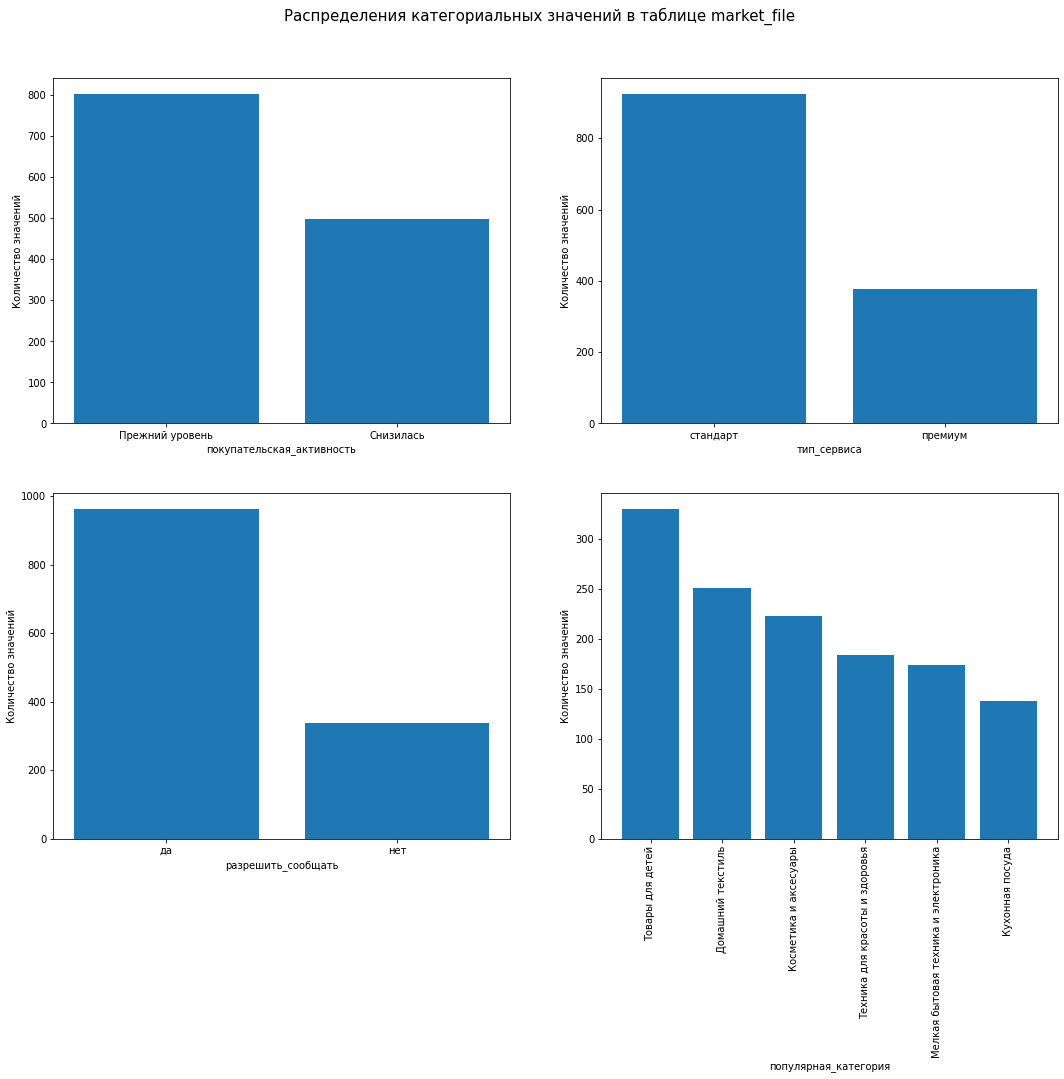

In [35]:
# Отобразим распределения категориальных значений
categories_charts(market_file, 
                 [
                     'покупательская_активность',
                     'тип_сервиса',
                     'разрешить_сообщать',
                     'популярная_категория'
                 ],
                 title='Распределения категориальных значений в таблице market_file',
                 figsize=(18,14))

Распределения полей ``покупательская_активность``, ``тип_сервиса`` и ``разрешить_сообщать`` - биномиальные.

In [36]:
market_file['покупательская_активность'].value_counts()

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

Распределение значений в целевом поле ``покупательская_активность`` - то, что нам предстоит предсказывать - несколько несбалансировано: 498 значений класса "Снизилась" против 802 значений класса "Прежний уровень". Необходимо будет обратить на это внимание при создании модели и проверить насколько сильно нам поможет ресемплирование тренировочных данных для улучшения качества модели предсказания снижения покупательской активности.

In [37]:
market_file['тип_сервиса'].value_counts()

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

В предоставленных данных преобладают клиенты, пользующиеся стандартным типом сервиса:
924 против 376 премиум клиентов.

In [38]:
market_file['разрешить_сообщать'].value_counts()

да     962
нет    338
Name: разрешить_сообщать, dtype: int64

Большая часть клиентов из исходных данных разрешают отправлять им маркетинговые сообщения: 962 против 338, которые против.

In [39]:
market_file['популярная_категория'].value_counts()

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

Больше всего покупателей, среди которых самая популярная категория товара - "Товары для детей" - 330 клиентов.
Меньше всего покупателей, среди которых самая популярная категория товара - "Кухонная посуда" - 138 клиентов.

#### Данные набора ``market_money``

##### Анализ непрерывных признаков

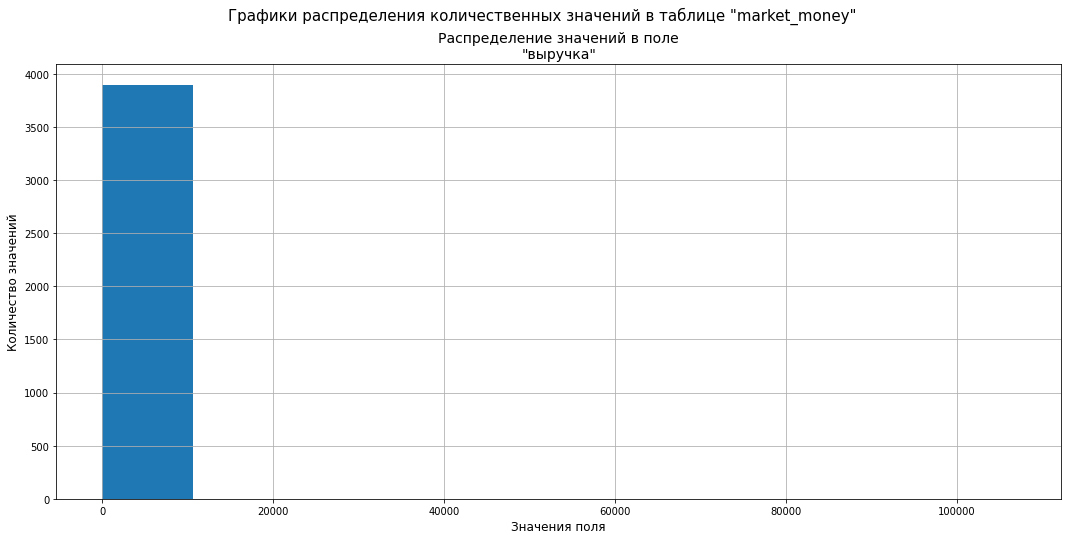

In [40]:
# Выведем гистограммы значений количественных полей в наборе market_money
histograms(market_money, ['выручка'], 'market_money', (18,8))

В распределении в поле выручка очевидный выброс. Следует разглядеть его поближе и решить что с ним сделать.

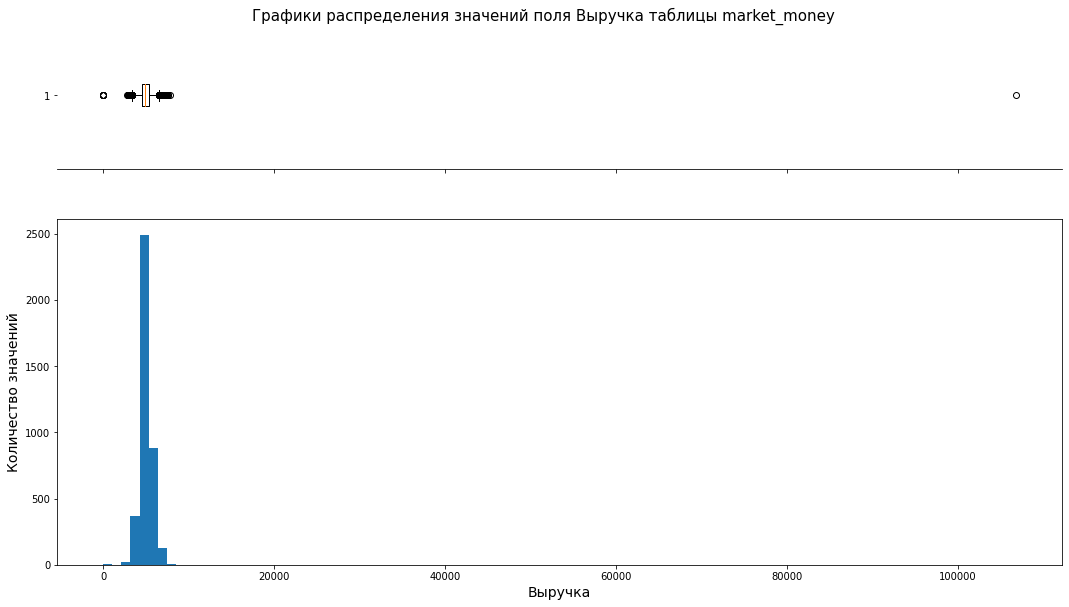

In [41]:
boxplot_hist(
    market_money['выручка'], 
    xlabel='Выручка', 
    title='Графики распределения значений поля Выручка таблицы market_money',
    bins=100
)

Теперь видно, что у нас только одно такое экстремально большое наблюдение с выручкой с одного пользователя в конкретном месяце более 100000.

А еще стало видно единственное экстремально малое значение выручки, еще один выброс - около 0.

Посмотрим на оба наблюдения и на данные пользователей, которым принадлежат эти наблюдения, поближе.

In [42]:
market_money[(market_money['выручка'] > 100_000) | (market_money['выручка'] < 100)]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
98,215380,текущий_месяц,106862.2


Действительно, есть ряд пользователей, с которых в предыдущий и препредыдущие месяцы не было никакой выручки.

Мы их удалим, т.к. модель должна предсказывать снижение покупательской активности только по тем пользователям, которые были активны в последние 3 месяца.

А вот по пользователю 215380, выручка которого на порядок выбивается из основной массы, есть следующие соображения:
- В данных может быть ошибка, но мы не можем это проверить, т.к. у нас нет информации о количестве и номенклатуре приобретенных товаров, чтобы подтвердить это или опровергнуть.
- Значение выглядит вполне реалистично: число не круглое, что могло бы сигнализировать о некорректной его записи.
- Вполне вероятно, что выручка - реальная. Данный клиент является т.н. "китом".

Исходя из вышесказанного, лучшим решением будет удалить наблюдения, связанные с этим пользователем, т.к. подобный выброс - это не нормальная история для интернет магазина и он однозначно плохо скажется на качестве обучения будущей модели.

In [43]:
# Сохраним id всех покупателей, чьи записи нам необходимо удалить из всех наборов данных
consumers_to_del = list(
    market_money[
        (market_money['выручка'] > 100_000) | (market_money['выручка'] == 0)
    ]['id'].unique()
)

In [44]:
# Проверяем содержимое полученного списка
consumers_to_del

[215348, 215357, 215359, 215380]

In [45]:
# Удалим записи с этими ID из всех наборов данных

print("Размер market_file до удаления:", market_file.shape[0])
market_file = market_file.query("id not in @consumers_to_del")

print("Размер market_file после удаления:", market_file.shape[0])

Размер market_file до удаления: 1300
Размер market_file после удаления: 1296


In [46]:
print("Размер market_money до удаления:", market_money.shape[0])
market_money = market_money.query("id not in @consumers_to_del")

print("Размер market_money после удаления:", market_money.shape[0])

Размер market_money до удаления: 3900
Размер market_money после удаления: 3888


In [47]:
print("Размер market_time до удаления:", market_time.shape[0])
market_time = market_time.query("id not in @consumers_to_del")

print("Размер market_time после удаления:", market_time.shape[0])

Размер market_time до удаления: 2600
Размер market_time после удаления: 2592


In [48]:
print("Размер money до удаления:", money.shape[0])
money = money.query("id not in @consumers_to_del")

print("Размер money после удаления:", money.shape[0])

Размер money до удаления: 1300
Размер money после удаления: 1296


Удаления произведены корректно.

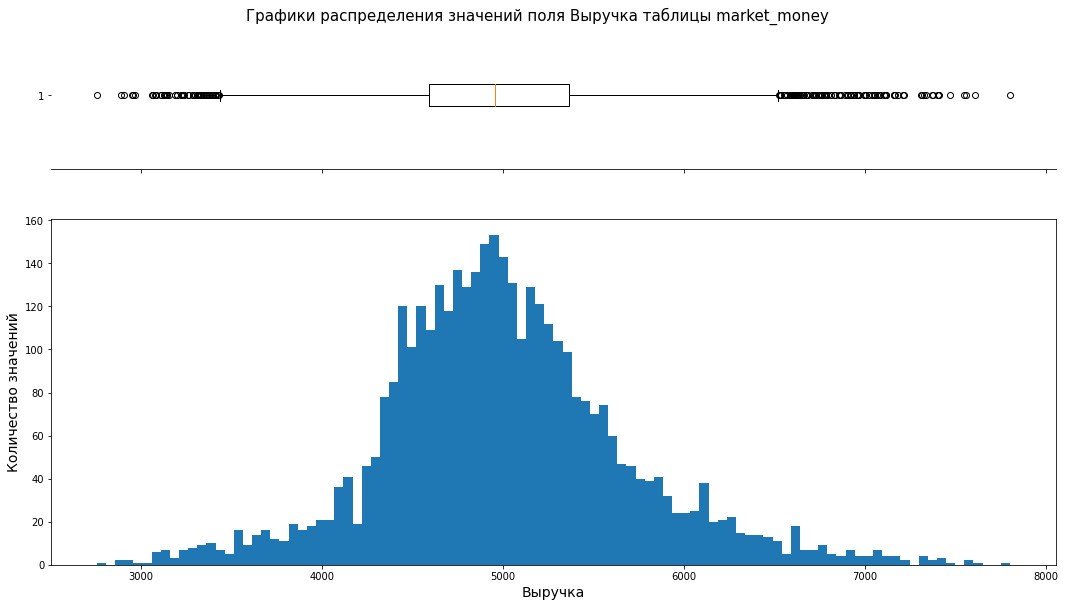

In [49]:
# Проверяем график распределения данных в поле "Выручка"
boxplot_hist(
    market_money['выручка'], 
    xlabel='Выручка', 
    title='Графики распределения значений поля Выручка таблицы market_money',
    bins=100
)

Поле имеет нормальное распределение с относительны длинными левым и правым хвостами.

##### Анализ категориальных признаков
Ознакомимся с распределением данных в единственном категориальном поле.

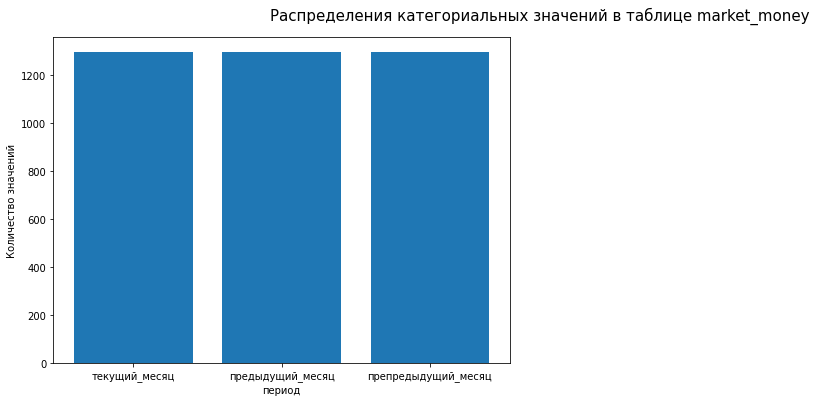

In [50]:
# Отобразим распределения категориальных значений
categories_charts(market_money,
                 ['период'],
                 title='Распределения категориальных значений в таблице market_money',
                 figsize=(18,6))

На лицо идеальный пример равномерного распределения.

#### Данные набора ``market_time``

##### Анализ непрерывных признаков

У нас всего один непрерывный признак - ``минут``.
Взяли его за непрерывный признак, т.к. вероятнее всего он был получен за счет округления из исходных замеров в минутах и секундах.

Сразу построим совмещенный график с гистограммой и ящиком с усами

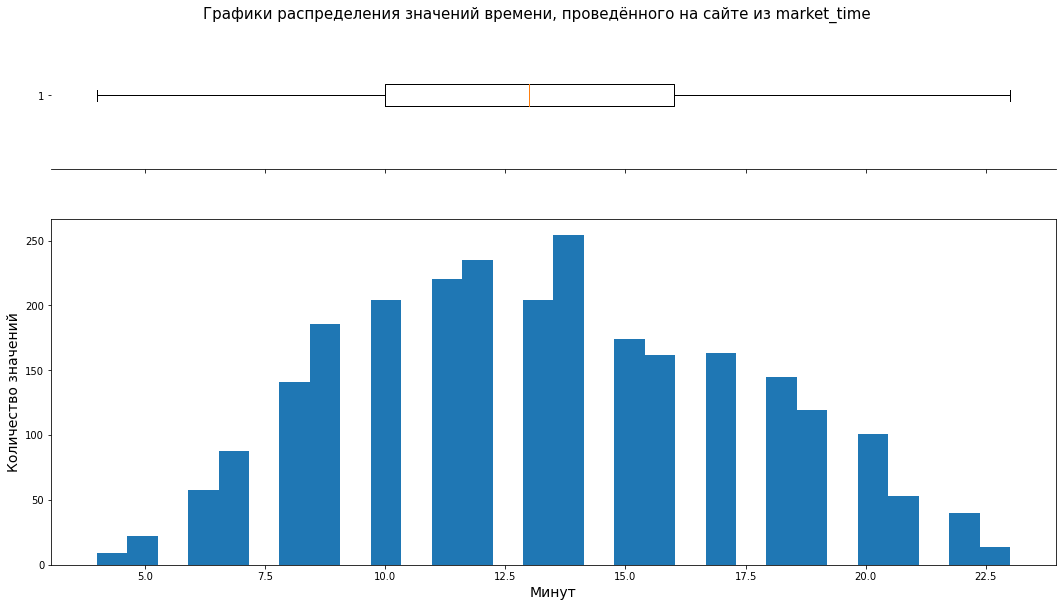

In [51]:
# Проверяем график распределения данных в поле "минут"
boxplot_hist(
    market_time['минут'], 
    xlabel='Минут', 
    title='Графики распределения значений времени, проведённого на сайте из market_time',
    bins=30
)

- График распределения значений в поле "минут" имеет вид близкий к нормальному распределению, хотя все значения в этом поле - дискретные.

##### Анализ категориальных признаков

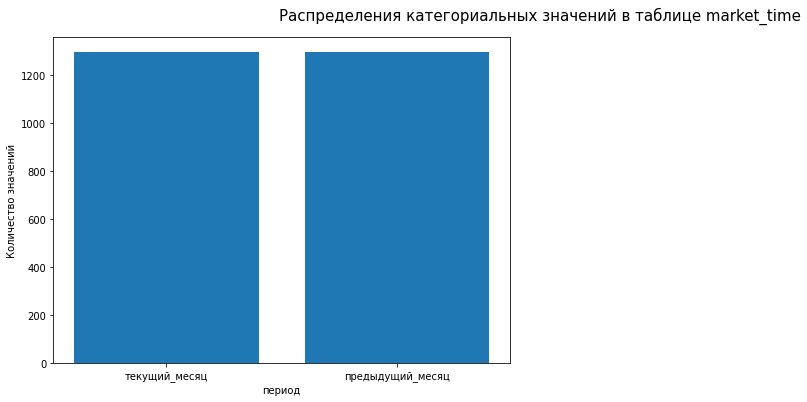

In [52]:
# Отобразим распределения категориальных значений
categories_charts(market_time,
                  ['период'],
                  title='Распределения категориальных значений в таблице market_time',
                 figsize=(18,6))

В поле "Период" также нет никаких сюрпризов, равномерное распределение, как и ожидалось.

#### Данные набора ``money``

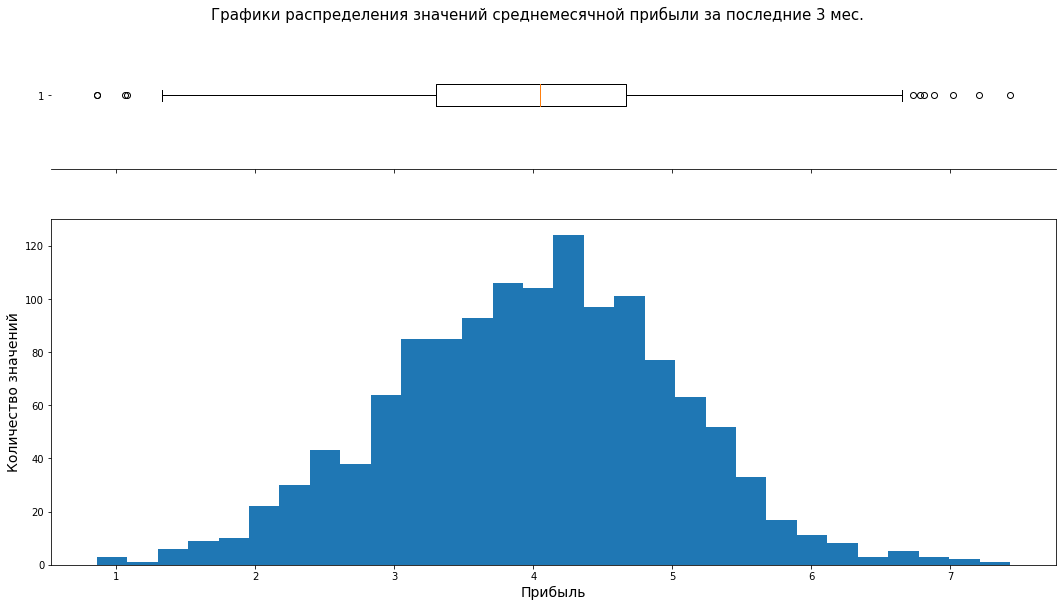

In [53]:
# Проверяем график распределения данных в поле "прибыль"
boxplot_hist(
    money['прибыль'], 
    xlabel='Прибыль', 
    title='Графики распределения значений среднемесячной прибыли за последние 3 мес.',
    bins=30
)

- Распределение значений в поле "Прибыль" - нормальное с длинными хвостами слева и справа. Центр распределения немного смещен в правую сторону.

В наборе money нет категориальных величин.

#### Итоги исследовательского анализа данных

В результате исследовательского анализа данных было выявлено следующее:
- В наборе данных market_file 
  - все величины находятся в допустимых диапазонах, нет выбросов, подозрительно малых или больших значений;
  - бОльшинство распределений числовых величин - дискретные
  - распределение значений в поле "акционные_покупки" - бимодальное
  - распределение целевого признака "покупательская_активность" - несбалансированное. Это следует учесть в подготовке данных к обучению модели.
  - пользователей со стандартной подпиской больше, чем пользователей с премиум подпиской
  - пользователей, согласившихся на маркетинговые рассылки, больше, чем отказавшихся от них
  - больше пользователей у которых самая популярная категория "Товары для детей", меньше всего пользователей, у которых самая популярная категория "Кухонная посуда"
- В наборе данных market_money
  - Был обнаружен единственный покупатель, у которого месячная выручка на порядок больше, чем у всех остальных - свыше 100000.
  - Были выявлены 3 покупателя, которые не были активны в течении одного или двух месяцев за последние 3 месяца
- В наборах данных market_time и money
  - не было выявлено каких-либо странностей и особенностей

В результате из всех наборов данных мы удалили наблюдения с ID пользователей, у которых хотя бы один месяц не было покупательской активности (согласно данным из market_money), а также пользователя (вероятно кита), с которого выручка в один из месяцев была чрезмерно высокой - эти данные помешали бы найти наилучшую модель для определения покупателей, у которых вероятно снизится покупательская активность.

<a id='Объединение-таблиц'></a>

### Объединение таблиц

На данном этапе подготовки данных к обучению модели нам необходимо объединить данные из трех исходных наборов ``market_file``, ``market_money`` и ``market_time`` в один общий.

Модель должна научиться определять конкретных пользователей, чья покупательская активность, вероятнее всего, снизится.

Это означает, что одно наблюдение должно обозначать одного конкретного пользователя.

Задача усложняется тем, что в наборах ``market_money`` и ``market_time`` данные предоставлены в так называемом plain формате, где на один ID пользователя приходится две или три записи, которые различаются только значением поля "Период", а также значениями в поле "выручка" и "минут" соответственно.

Таблицы в plain формате всегда можно свернуть в pivot формат, в котором на каждый id пользователя будет только одна строка, а значения "выручка" и "минут" будут размножены в разных столбцах в зависимости от значений поля "период".

Т.е. на примере таблицы ``market_time`` выглядеть это будет примерно так:

```
id, период, минут => id, текущий_месяц_минут, предыдущий_месяц_минут
```

При том, что "текущий месяц" и "предыдущий месяц" - уникальные значения поля "период"

Создадим свернутые версии таблиц market_money и market_time и присоединим их к таблице market_file

In [54]:
market_money_pivoted = market_money.pivot(
    index="id",
    columns="период",
    values="выручка"
)

market_money_pivoted.columns = [f'{col}_выручка' for col in market_money_pivoted.columns]

market_money_pivoted.head()

,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


In [55]:
market_time_pivoted = market_time.pivot(
    index="id",
    columns="период",
    values="минут"
)

market_time_pivoted.columns = [f'{col}_минут' for col in market_time_pivoted.columns]

market_time_pivoted.head()

,предыдущий_месяц_минут,текущий_месяц_минут
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10


In [56]:
# соединим все наборы вместе
market_data = market_file.merge(market_money_pivoted, on="id")
market_data = market_data.merge(market_time_pivoted, on="id")

describe_dataframe(market_data)

Содержимое первых 5 строк набора данных:


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10




Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  

None



Статистики количественных полей:


,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,215999.464506,4.256404,4.009259,602.967593,0.320069,3.267747,2.841821,4.184414,8.187500,4947.468750,4836.202160,5238.096065,13.470679,13.210648
std,374.327860,1.013525,0.696316,249.195823,0.249159,1.355125,1.974074,1.951719,3.978459,700.797239,333.514091,834.318717,3.937630,4.221794
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000,2890.000000,4098.000000,2758.700000,5.000000,4.000000
25%,215675.750000,3.700000,4.000000,409.500000,0.170000,2.000000,1.000000,3.000000,5.000000,4498.125000,4584.500000,4706.050000,10.750000,10.000000
50%,215999.500000,4.200000,4.000000,606.500000,0.240000,3.000000,3.000000,4.000000,8.000000,5005.500000,4810.500000,5179.950000,13.000000,13.000000
75%,216323.250000,4.900000,4.000000,806.250000,0.300000,4.000000,4.000000,6.000000,11.000000,5405.625000,5056.000000,5759.275000,17.000000,16.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000,6869.500000,5663.000000,7799.400000,23.000000,23.000000




Пропуски данных в полях набора:


,Кол-во пропусков,Доля пропусков
id,0,0.000000
покупательская_активность,0,0.000000
тип_сервиса,0,0.000000
разрешить_сообщать,0,0.000000
маркет_актив_6_мес,0,0.000000
маркет_актив_тек_мес,0,0.000000
длительность,0,0.000000
акционные_покупки,0,0.000000
популярная_категория,0,0.000000
средний_просмотр_категорий_за_визит,0,0.000000




Количество полных дубликатов в датафрейме: 0


Данные успешно соединены по id покупателей.

В результате мы получили набор данных с 1296 наблюдениями и 17 параметрами (если исключить id).

<a id="Корреляционный-анализ"></a>

### Корреляционный анализ

#### Матрица корреляции признаков

Учитывая, что ряд количественных значений имеет не нормальное распределение, а также то, что искомый признак и три независимых - категориальные, используем метод Phik.

Для того, чтобы быть уверенными в результатах, явно перечислим все количественные поля в параметре ``interval_cols``.

In [1]:
# Готовим зону для рисования
fig, axes = plt.subplots(
        figsize=(12,10)
    )

# рассчитываем и отрисывываем корреляцию между всеми параметрами кроме id
sns.heatmap(
    market_data.drop(['id'],axis=1).phik_matrix(
        interval_cols=['маркет_актив_6_мес', 'маркет_актив_тек_мес', 
                       'длительность', 'акционные_покупки',
                       'средний_просмотр_категорий_за_визит', 
                       'неоплаченные_продукты_штук_квартал', 
                       'ошибка_сервиса', 'страниц_за_визит', 
                       'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка',
                       'текущий_месяц_выручка', 'предыдущий_месяц_минут',
                       'текущий_месяц_минут'
                      ]
    ),
    annot=True, 
    fmt='.2f', 
    axes=axes
)

plt.suptitle("Матрица Phik корреляций признаков общего набора данных market_data", 
             fontsize=15,
             y=0.95
            )

plt.show()

NameError: name 'plt' is not defined

Основные наблюдения:
1. Не обнаружено мультиколлинеарности между входными признаками (нет ни одного значения корреляции выше 0.9)
2. Наблюдается сильная корреляция (0.84) между выходными признаками (но не более того)
  - ``текущий_месяц_выручка`` и ``предыдущий_месяц_выручка``
3. У ряда входных признаков полностью отсутствует корреляция с целевым:
  - ``разрешить_сообщать``
  - ``маркет_актив_тек_мес``
4. Единственный признак, у которого высокая корреляция (по шкале Чедокка) с целевым признаком
  - ``страниц_за_визит`` - 0.75
5. Есть ряд входных признаков, у которых наблюдается заметная корреляция с целевым признаком:
  - ``маркет_актив_6_мес`` - 0.54
  - ``акционные_покупки`` - 0.51
  - ``средний_просмотр_категорий_за_визит`` - 0.54
  - ``неоплаченные_продукты_штук_квартал`` - 0.51
  - ``предыдущий_месяц_выручка`` - 0.5
  - ``предыдущий_месяц_минут`` - 0.69
  - ``текущий_месяц_минут`` - 0.58

#### Итоги корреляционного анализа

В итоговом наборе данных ``market_data`` не было выявлено случаев мультиколлинеарности между входными признаками, поэтому действий по ее устранению не потребовалось.

Самая высокая корреляция с целевым признаком у единственного входного:
- ``страниц_за_визит``

У признаков ``разрешить_сообщать`` и ``маркет_актив_тек_мес`` корреляция с целевым признаком полностью отсутствует.

<a id="Поиск-лучшей-модели-для-предсказания-вероятности-снижения-покупательской-активности"></a>

### Поиск лучшей модели для предсказания вероятности снижения покупательской активности

По условию задачи требуется создать модель классификации наблюдений из интернет-магазина "В Один Клик", которая должна предсказывать снизится ли покупательская активность конкретного покупателя или нет.

Для поиска наилучшей модели мы применим на нашем наборе данных все уже изученные модели:
- Логистической регрессии
- Классификация по К ближайших соседей
- Метод опорных векторов
- Дерево решений

Прежде чем обучать модели мы должны будем подготовить данные к машинному обучению. При этом следует учесть, что целевой признак у нас несбалансирован, поэтому при разделении данных потребуется стратифицировать по нему.

Для автоматизации подготовки, обучения, перебора моделей и подбора гиперпараметров мы воспользуемся пайплайнами.

Поиск наилучшей модели будем осуществлять при помощи инструмента RandomizedSearchCV - он обеспечит нам баланс между качеством перебора и скоростью.

Для оценки качества модели будем использовать метрику ROC-AUC. Она лучше всего подходит для нашего случая:
- Нет конкретного требования к модели по 100% определению всех, у кого покупательская активность снизится или наоборот, останется прежней => важно наиболее точно определять и тех и других
- Мы перебираем множество моделей, поэтому нам важно их качество не зависимо от выбираемого порога вероятности для отнесения покупателя к одному или другому классу
- Целевой признак несбалансирован, ROC-AUC хорошо подходит в данном случае

#### Подготовка данных для МО

In [59]:
# Разделяем данные на обучающую, валидационную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    market_data.drop(['id','покупательская_активность'], axis=1),
    market_data['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_data['покупательская_активность'])

print("Форма тренровочной выборки:", X_train.shape)
print("Форма тестовой выборки:", X_test.shape)

Форма тренровочной выборки: (972, 16)
Форма тестовой выборки: (324, 16)


Можем использовать LabelEncoder для кодирования целевого признака, поскольку с числовыми признаками модели работают быстрее.

LabelEncoder кодирует признаки в лексикографическом порядке, и в нашем случае это подходит, т.к. нам и надо, чтобы значение "Снизилась" было закодировано, как 1, а значение "Прежний уровень", как 0.

In [60]:
# Кодируем целевой признак и проверяем, так ли он закодировал, как нам надо
label_encoder = LabelEncoder()

label_encoder.fit(y_train)

label_encoder.classes_

array(['Прежний уровень', 'Снизилась'], dtype=object)

In [61]:
# Отлично, преобразовываем целевой признак
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

***
Беремся за кодирование и масштабирование входных признаков.

В первую очередь нам надо определить какие кодировщики для каких признаков нам лучше всего использовать.

- Все числовые поля набора данных market_data - количественные признаки, среди них нет категориальных, поэтому в пайплайне мы их будем масштабировать при помощи StandardScaler и MinMaxScaler


- У нас есть категориальный признак, который можно представить как ранговый и кодировать при помощи OrdinalEncoder:
  - ``тип_сервиса`` со значениями "премиум" и "стандарт". Можно принять за то, что "премиум" лучше и его значение после кодирования должно быть выше. Но это все очень неоднозначно. Возможные пропуски в будущих данных будем заполнять наиболее частым значением.

- Один категориальный признак лучше всего закодировать как OneHotEncoder:
  - ``популярная_категория`` - его значения невозможно ранжировать. Также необходимо учесть, что в будущем, в новых данных могут появиться новые, неизвестные на момент обучения модели значения. Поэтому необходимо будет реализовать корректную обработку пропусков.
  - ``разрешить_сообщать`` со значениями "да" и "нет". Возможные пропуски в будущих данных будем заполнять наиболее частым значением.
  
При этом, учитывая, что мы будем использовать разные модели, попробуем при помощи пайплайнов и RandomizedSearchCV перебрать оба варианта кодирования для всех категориальных признаков

In [62]:
# Разделяем параметры на количественные и категориальные (OHE и ORD)
num_cols = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 
           'длительность', 'акционные_покупки',
           'средний_просмотр_категорий_за_визит', 
           'неоплаченные_продукты_штук_квартал', 
           'ошибка_сервиса', 'страниц_за_визит', 
           'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка',
           'текущий_месяц_выручка', 'предыдущий_месяц_минут',
           'текущий_месяц_минут'
          ]

cat_cols = ['популярная_категория',
           'тип_сервиса', 'разрешить_сообщать']

In [63]:
# Пайплайн для кодирования категориальных значений
enc_pipe = Pipeline([
    ('simpleImputer_before_enc', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('enc', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('simpleImputer_after_enc', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
]
)

In [64]:
# Определяем column transformer
data_preprocessor = ColumnTransformer([
        ('enc', enc_pipe, cat_cols),
        ('num', MinMaxScaler(), num_cols)
    ],
    remainder='passthrough'
)

Готов обработчик исходных данных

#### Пайплайн модели

Здесь мы определим финальный пайплайн : подготовка данных и модель.

Возьмем за модель по-умолчанию - логистическую регрессию.

In [65]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression(random_state=RANDOM_STATE))
    ]
)

Финальный пайплайн готов, можем приступать к поиску лучшей модели.

#### Поиск лучшей модели

Поиск лучшей модели будем проводить через RandomizedSearchCV.

Для этого требуется определить сетку параметров, по которой будет происходить перебор.

В сетке параметров укажем:
- разные варианты кодирования категорийных параметров - Ohe и Ordinal
- разные инструменты масштабирования количественных параметров - MinMax и Standard
- Модели МО: LogisticRegression, SVC, KNeighboursClassifier, DecisionTreeClassifier
- диапазоны значений гиперпараметров моделей

In [66]:
param_grid = [
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
        'preprocessor__enc__enc': [
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
        ]
    },
    # словарь для модели SVC() с ядром  'linear'
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='linear', probability=True)],
        'models__C': [0.01, 0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
        'preprocessor__enc__enc': [
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
        ]
    },
    # словарь для модели SVC() с ядрами  'rbf', 'sigmoid'
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['rbf', 'sigmoid'],
        'models__C': [0.01, 0.1, 1, 10],
        'models__gamma': [0.01, 0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
        'preprocessor__enc__enc': [
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
        ]
    },
    # словарь для модели SVC() с ядром 'poly'
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2,5),
        'models__C': [0.01, 0.1, 1, 10],
        'models__gamma': [0.01, 0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
        'preprocessor__enc__enc': [
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
        ]
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(3,50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
        'preprocessor__enc__enc': [
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
        ]
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1,6),
        'models__max_features': range(1,6),
        'models__min_samples_leaf': range(1, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
        'preprocessor__enc__enc': [
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
        ]
    }    
]

С таким набором вариантов у нас получается следующее количество комбинаций:
- Логистическая регрессия: 4 * 2 * 2 = 16
- SVC с линейным ядром: 4 * 2 * 2 = 16
- SVC с ядрами ``rbf``, ``sigmoid``: 2 * 4 * 4 * 2 * 2 = 128
- SVC с ядром ``poly``: 3 * 4 * 4 * 2 * 2 = 192
- KNeighborsClassifier: 47 * 2 * 2 = 188
- DecisionTree: 5 * 5 * 5 * 2 * 2 = 500

Итого 1040 комбинаций.

Проверим случайным образом только 25 из них, потому что на бОльшем количестве время ожидания ответа от системы сильно увеличивается.

In [67]:
%%time

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=25, 
    verbose=3
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('\nМетрика лучшей модели на тренировочной выборке методом кросс-валидации:', randomized_search.best_score_, '\n')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END models=SVC(probability=True, random_state=42), models__C=10, models__gamma=0.1, models__kernel=rbf, preprocessor__enc__enc=OneHotEncoder(handle_unknown='ignore', sparse=False), preprocessor__num=StandardScaler(); total time=   0.2s
[CV 2/5] END models=SVC(probability=True, random_state=42), models__C=10, models__gamma=0.1, models__kernel=rbf, preprocessor__enc__enc=OneHotEncoder(handle_unknown='ignore', sparse=False), preprocessor__num=StandardScaler(); total time=   0.2s
[CV 3/5] END models=SVC(probability=True, random_state=42), models__C=10, models__gamma=0.1, models__kernel=rbf, preprocessor__enc__enc=OneHotEncoder(handle_unknown='ignore', sparse=False), preprocessor__num=StandardScaler(); total time=   0.2s
[CV 4/5] END models=SVC(probability=True, random_state=42), models__C=10, models__gamma=0.1, models__kernel=rbf, preprocessor__enc__enc=OneHotEncoder(handle_unknown='ignore', sparse=False), preprocessor_

In [68]:
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.9122881527322736


Итак, у нас на руках модель с довольно хорошим показателем ROC-AUC 0.905 на тренировочной выборке, и даже лучшим  - 0.912 - на тестовой выборке.

Ею оказалась модель KNeighborsClassifier с количеством соседей равным 13.

Наверняка, если бы мы делали полный перебор GridSearchCV, то могли бы найти еще более лучшую модель, но на это ушло бы очень много времени и потребовалось бы очень много вычислительных мощностей.

Вывод наилучшего пайплайна "съел" кусок информации о предобработке, а он нам тоже важен.

In [69]:
# Выводим информацию о деталях шага предобработки
randomized_search.best_estimator_.named_steps["preprocessor"]

ColumnTransformer(remainder='passthrough',
                  transformers=[('enc',
                                 Pipeline(steps=[('simpleImputer_before_enc',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('simpleImputer_after_enc',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['популярная_категория', 'тип_сервиса',
                                  'разрешить_сообщать']),
                                ('num', StandardScaler(),
                                 ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
                                  'длительность', 'акционные_по

В итоге лучшей комбинацией оказалось кодировать категорийные параметры при помощи Ordinal Encoder, а числовые параметры машстабировать при помощи Standard Scaler.

#### Итоги поиска лучшей модели

На данном этапе мы
- разделили общий набор данных на тренировочную и тестовые наборы. При этом учли, что целевой показатель несбалансирован: в наборе 802 наблюдения в которых его значение = "Прежний уровень", и только у 498 наблюдений - "Снизилась".
- Закодировали целевой признак при помощи LabelEncoder: 
  - ``Прежний уровень`` = 0, 
  - ``Снизилась`` = 1.
- построили пайплайн подготовки (масштабирования и кодирования) входных признаков для МО и запуска обучения модели МО на этих признаках.
- Воспользовались инструментом кросс-валидации ``RandomizedSearchCV``
  - Подготовили сетку параметров для перебора разных типов подготовки данных:
    - Масштабирование количественных признаков при помощи стандартизации и нормализации
    - Кодирование категорийных признаков при помощи OneHot и Ordinal кодировщиков
    - разные модели машинного обучения с настройкой гиперпараметров:
      - Логистической регрессии
      - Классификация по К ближайших соседей
      - Метод опорных векторов
      - Дерево решений

Всего получилось 1040 комбинаций, что довольно затратно и долго для полного перебора. Поэтому и был использован метод RandomizedSearchCV который совершил перебор на 25 случайно выбранных комбинациях (2.4% от общего числа комбинаций).

Отбор моделей провели сравнивая значение метрики ROC-AUC:
- Нет конкретного требования к модели по 100% определению всех, у кого покупательская активность снизится или наоборот, останется прежней => важно наиболее точно определять и тех и других
- Мы перебираем множество моделей, поэтому нам важно их качество не зависимо от выбираемого порога вероятности для отнесения покупателя к одному или другому классу
- Целевой признак несбалансирован, ROC-AUC хорошо подходит в данном случае

***

Лучшим пайплайном из 25 случайно отобранных оказался следующий:
- Масштабирование числовых признаков при помощи метода стандартизации
- Кодирование категорийных признаков пр помощи Ordinal кодировщика
- Обучение модели KNeighborsCLassifier с 13 соседями.

Качество лучшего пайплайна / модели:
- На тренировочных данных - ROC-AUC = 0.905
- На тестовых данных - ROC-AUC = 0.912

Что сигнализирует нам о том, что проблем с переобученностью модели нет.

<a id="Анализ-важности-признаков"></a>

### Анализ важности признаков

Для анализа вклада каждого отдельного признака в работу модели мы воспользуемся библиотекой Shap

#### Оценка важности признаков

Подготовим все для оценки важности признаков в модели KNeighborsClassifier

In [70]:
# Готовим данные для анализа
X_train_prepared = randomized_search.best_estimator_.named_steps["preprocessor"].transform(X_train)
X_train_prepared = pd.DataFrame(X_train_prepared, columns = cat_cols + num_cols)

X_test_prepared = randomized_search.best_estimator_.named_steps["preprocessor"].transform(X_test)
X_test_prepared = pd.DataFrame(X_test_prepared, columns = cat_cols + num_cols)

In [71]:
# Для того, чтобы можно было использовать shap на предсказаниях KNeighborsClassifier
# необходимо ему передавать рассчитанные вероятности
# Сделаем это, обернув вызов метода predict_proba в функцию
def predict_proba(x):
    return randomized_search.best_estimator_.named_steps["models"].predict_proba(x)[:,1]

Инициализируем и запустим "Объяснятель" из библиотеки shap, чтобы получить shap значения

In [72]:
# Используем KernelExplainer, который работает с любыми моделями.
# В качестве Background data, описывающей тренировочный набор данных, передадим центроиды 
# полученные в результате K Means кластеризации - 7 кластеров
explainer = shap.KernelExplainer(predict_proba, shap.kmeans(X_train_prepared, 7), feature_names=cat_cols + num_cols)

In [73]:
shap_values = explainer(X_test_prepared)

  0%|          | 0/324 [00:00<?, ?it/s]

И визуализируем полученные данные

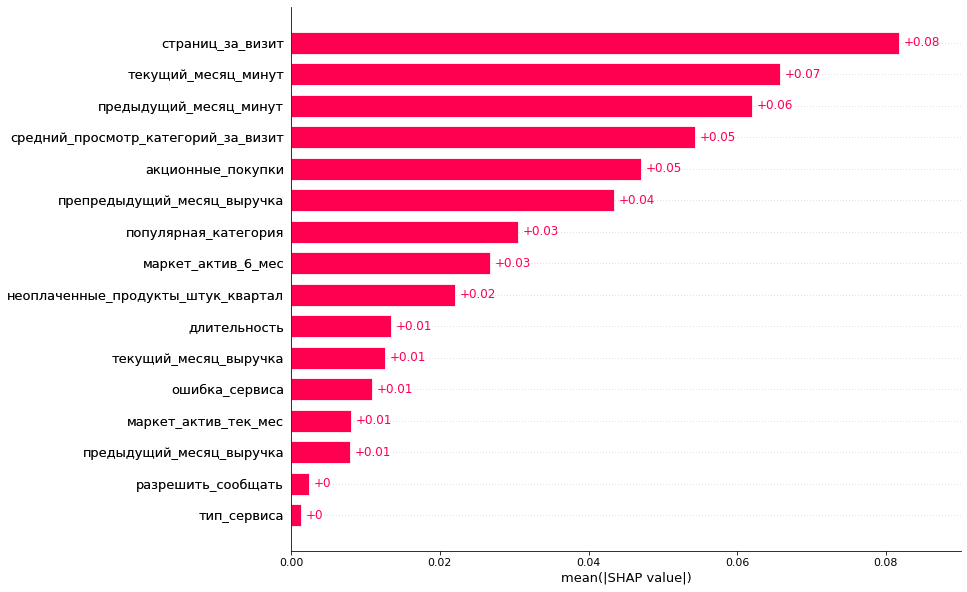

In [74]:
fig, axes = plt.subplots(
        figsize=(12,10)
    )

shap.plots.bar(shap_values, max_display=17, ax=axes)

plt.show()

Как видно, самый значимый признак - ``страниц_за_визит``. 

За ним с небольшим отрывом следуют другие признаки, описывающие активность пользователей на сайте: 
- ``текущий_месяц_минут``, 
- ``предыдущий_месяц_минут``,
- ``средний_просмотр_категорий_за_визит``

Самые малозначимые для модели признаки:
- ``разрешить_сообщать``
- ``тип_сервиса``

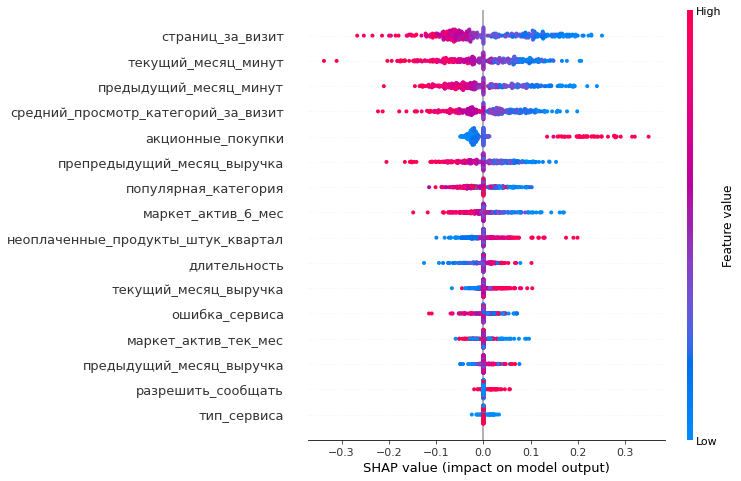

In [75]:
shap.plots.beeswarm(shap_values, max_display=17) 

На данном графике видно, что первая четверка самых значимых признаков (активности пользователей на сайте) ведут себя схоже:
- увеличение значений этих признаков играет в пользу того, что активность покупателя останется прежней
- уменьшение значений этих признаков играет в пользу того, что покупательская активность пользователя снизится

Довольно интересно влияние признака ``акционные_покупки`` - увеличение его значения увеличивает вероятность того, что покупательская активность пользователя снизится, но при низких его значениях, его влияние на то, что покупательская активность останется прежней, невелико.

Также стоит отметить, что бОльшая выручка за препредыдущий месяц также сигнализирует модели о том, что покупательская активность останется прежней.

Довольно сильно влияет на увеличение вероятности снижения покупательской активности большое количество неоплаченных продуктов в квартал.

#### Выводы о значимости признаков:

В результате анализа значимости признаков методом SHAP удалось определить следующее.

Наименее значимые признаки модели для предсказания вероятности снижения покупательской способности - это категориальные признаки
- ``разрешить_сообщать`` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель
- ``тип_сервиса`` - уровень сервиса, например «премиум» и «стандарт»

Наиболее значимый признак для предсказания:
- ``страниц_за_визит`` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

За ним по значимости с небольшим отрывом следуют следующие признаки активности пользователей:
- ``текущий_месяц_минут`` - значение времени, проведённого на сайте, в минутах, в текущем месяце 
- ``предыдущий_месяц_минут``- значение времени, проведённого на сайте, в минутах, в предыдущем месяце
- ``средний_просмотр_категорий_за_визит`` - сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца


Это говорит нам о том, что уровень пользовательской активности в рамках нашей модели очень сильно влияет на вероятность того сохранится ли покупательская активность или снизится.

При этом чем активнее пользователь ведет себя в интернет магазине: просматривает больше страниц за один визит, больше минут провел в магазине за текущий и прошедший месяца, больше категорий товаров просматривает за визит в среднем, тем выше вероятность того, что его покупательская активность сохранится прежней.

Также было замечено, что у пользователей, которые покупают больше по акциям, увеличивается вероятность снижения покупательской активности.

<a id="Сегментация-покупателей"></a>

### Сегментация покупателей

#### Сегментация по вероятности снижения покупательской активности и прибыльности

Начнем с того, что постараемся разделить всех пользователей из нашего набора данных на несколько сегментов в зависимости от вероятности снижения покупательской активности и от их прибыльности.

За границу разделения вероятности снижения покупательской активности возьмем 0.5

Сначала нам необходимо получить полный набор покупателей с предсказанной вероятностью снижения активности и прибыльностью.

Для этого запустим предсказания вероятностей на полном наборе данных и соединим их с данными из набора ``money``.

In [76]:
# Подготовим общий набор данных

# Соединим данные интернет-магазина с данными финансового департамента о прибыльности клиента
market_data_full = market_data.merge(
    money,
    on="id"
)

# Добавим категорийное поле с предсказаниями вероятности снижения покупательской активности: 
# низкая и высокая вероятность
market_data_full["вероятность_снижения_активности"] = randomized_search.predict(
    market_data.drop(['id','покупательская_активность'], axis=1)
)
market_data_full["вероятность_снижения_активности"] = (
    market_data_full["вероятность_снижения_активности"].apply(lambda x: 'низкая' if x == 0 else 'высокая')
)

Приведем доход к абсолютным значениям, т.к. нам интересны не только те пользователи, которые покупают маржинальные товары, но и те, кто покупает много и, таким образом, тоже увеличивает доход интернет-магазина.

In [77]:
# Расчитаем доход с каждого клиента за последние 3 месяца
market_data_full["доход"] = (
    (market_data_full["предыдущий_месяц_выручка"] +
    market_data_full["препредыдущий_месяц_выручка"] +
    market_data_full["текущий_месяц_выручка"]) *
    (market_data_full["прибыль"] / 100 )
)

Теперь мы можем разделить пользователей по доходу, который они принесли компании.

Сначала изучим распределение значений в этом поле, затем определим границы категорий.

Предположительно, у нас должно получиться три категории:
- Низкий доход
- Средний доход
- Высокий доход

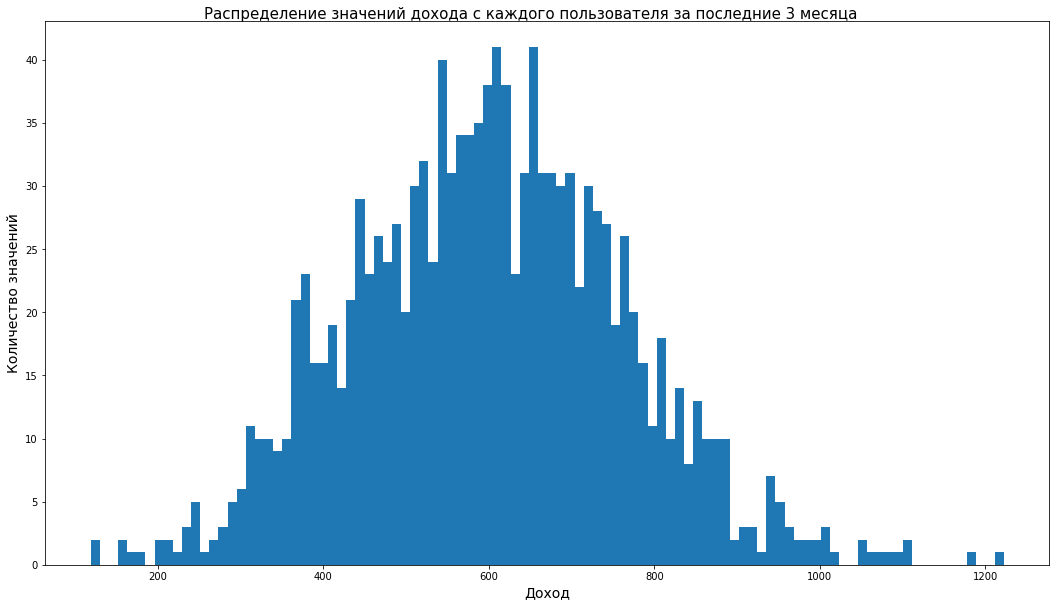

In [78]:
# Построим график распределения значений дохода с каждого пользователя
fig, ax = plt.subplots(
    figsize=(18, 10)
)

# отрисовываем гистограмму
ax.hist(market_data_full["доход"], bins=100)
ax.set_xlabel("Доход",
                fontsize=14)
ax.set_ylabel('Количество значений',
                fontsize=14)

plt.suptitle("Распределение значений дохода с каждого пользователя за последние 3 месяца", 
             fontsize=15, 
             y=0.9)
plt.show()

Мы получили вполне нормальное распределение с несколькими относительно высокими значениями дохода около 1200.

Учитывая это, можно разделить всех покупателей на 3 категории при помощи метода Pandas ``qcut``

In [79]:
# Разделим
market_data_full['категория_доходности'] = pd.qcut(
    market_data_full['доход'], 3, labels=['Низкая', 'Средняя', 'Высокая']
)

# и проверим
market_data_full.groupby('категория_доходности')['доход'].median().round(2)

категория_доходности
Низкая     438.74
Средняя    600.08
Высокая    754.25
Name: доход, dtype: float64

In [80]:
# Выведем границы категорий
market_data_full.groupby('категория_доходности')['доход'].min().round(2)

категория_доходности
Низкая     118.85
Средняя    528.65
Высокая    670.17
Name: доход, dtype: float64

В категорию низкой доходности попадают все покупатели с которых 0 < "доход за последние 3 мес" < 528.65

В категорию средней доходности: 528.65 <= "доход за последние 3 мес" < 670.17

В категорию высокой доходности: "доход за последние 3 мес" >= 670.17

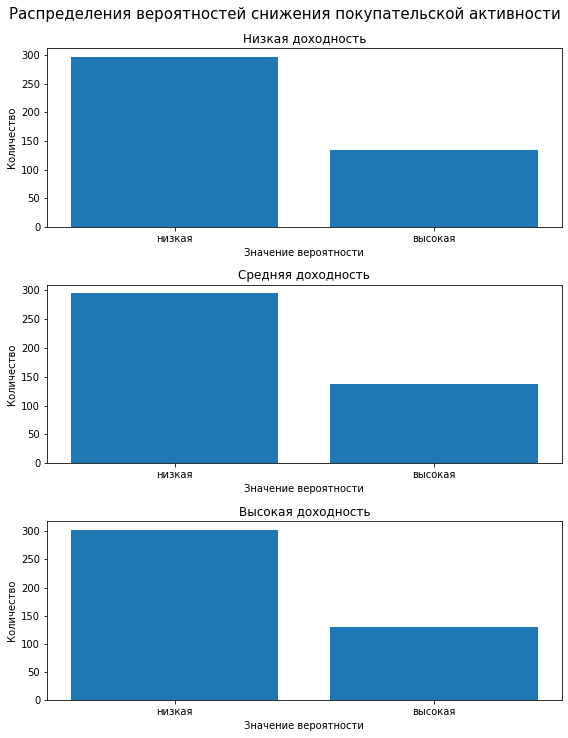

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

for i, (group_name, group_data) in enumerate(market_data_full.groupby('категория_доходности')):
    category_dist = group_data["вероятность_снижения_активности"].value_counts()
    axes[i].bar(
        category_dist.index,
        category_dist
    )
    
    axes[i].set_title(f'{group_name} доходность')
    axes[i].set_xlabel("Значение вероятности")
    axes[i].set_ylabel("Количество")


plt.tight_layout()

plt.suptitle(
    "Распределения вероятностей снижения покупательской активности",
    fontsize=15, 
    y=1.02
)

plt.show()

In [82]:
market_data_full.groupby('категория_доходности')["вероятность_снижения_активности"].value_counts()

категория_доходности  вероятность_снижения_активности
Низкая                низкая                             297
                      высокая                            135
Средняя               низкая                             294
                      высокая                            138
Высокая               низкая                             303
                      высокая                            129
Name: вероятность_снижения_активности, dtype: int64

В итоге мы получили 6 категорий клиентов:
- Высокая доходность с низкой вероятностью снижения покупательской активности - 303
- Высокая доходность с высокой вероятностью снижения покупательской активности - 129
- Средняя доходность с низкой вероятностью снижения покупательской активности - 294
- Средняя доходность с высокой вероятностью снижения покупательской активности - 138
- Низкая доходность с низкой вероятностью снижения покупательской активности - 297
- Низкая доходность с высокой вероятностью снижения покупательской активности - 135

В общем, видно, что не наблюдается хоть какой-нибудь зависимости между доходностью клиента и вероятностью снижения его покупательской активности.

Распределения вероятностей снижения покупательской активности примерно одинаковы для всех категорий доходности.

#### Анализ сегмента пользователей с высокой доходностью и высокой вероятностью снижения покупательской активности

Рассмотрим наиболее доходных пользователей, которые вероятнее всего станут меньше покупать в интернет-магазине.

Такой сегмент пользователей интересен, потому что удержание таких пользователей напрямую влияет на доходы компании.

In [83]:
market_data_full.groupby(['категория_доходности','вероятность_снижения_активности'])['доход'].agg(['sum','count'])

sum  count
категория_доходности вероятность_снижения_активности                     
Низкая               высокая                           56318.70326    135
                     низкая                           125876.65928    297
Средняя              высокая                           82560.27391    138
                     низкая                           176556.45723    294
Высокая              высокая                          100750.28024    129
                     низкая                           235662.23192    303

Также потеря этих пользователей сильнее всего скажется на доходности интернет-магазина, т.к. общая сумма дохода с каждого покупателя из этого сегмента за последние 3 месяца - самая высокая среди всех клиентов, которые вероятнее всего в скором времени станут покупать меньше.

***
Сравним распределения самых значимых параметров модели этого сегмента с сегментом клиентов с высокой доходностью и низкой вероятностью снижения покупательской активности

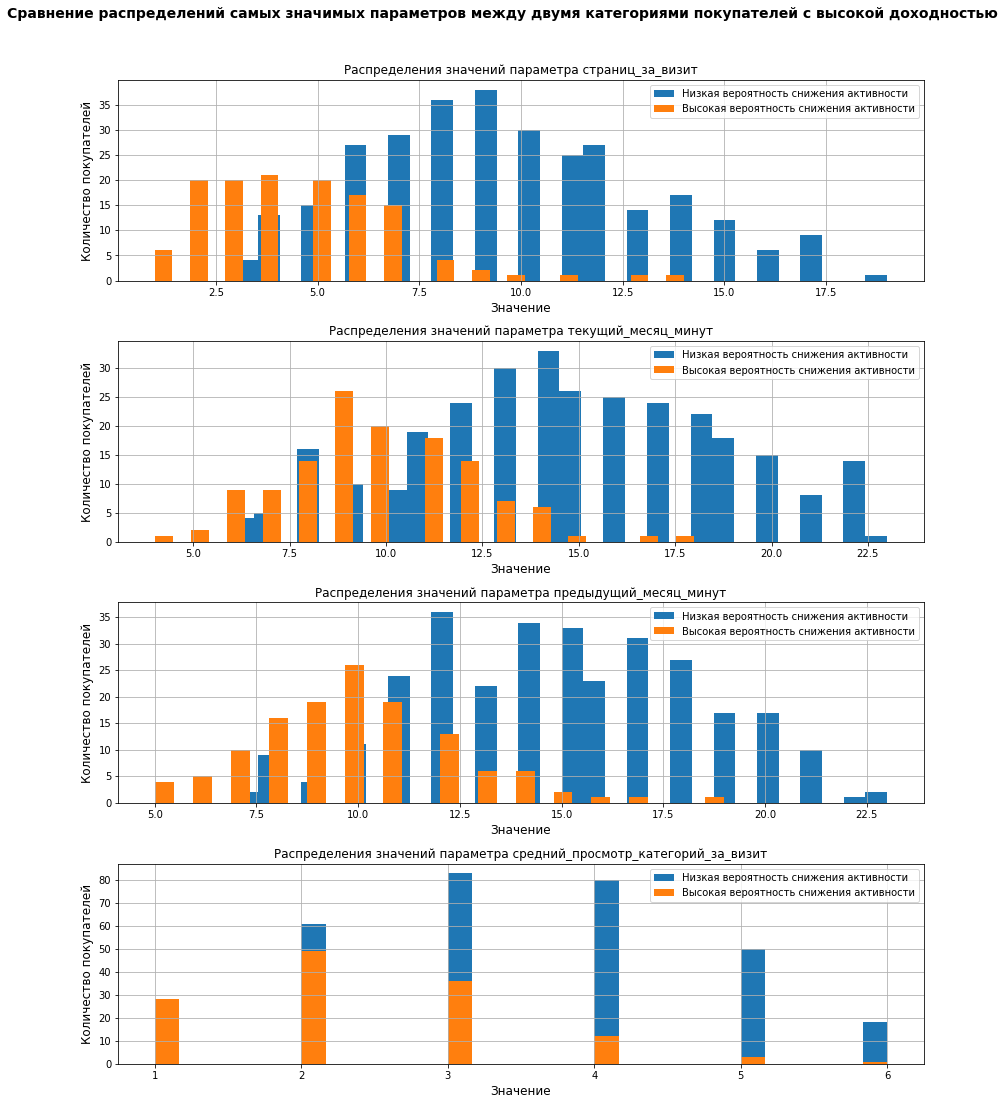

In [84]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))


for i, col in enumerate(['страниц_за_визит', 'текущий_месяц_минут',
            'предыдущий_месяц_минут', 'средний_просмотр_категорий_за_визит']):
    (
        market_data_full
            .query("категория_доходности == 'Высокая' and вероятность_снижения_активности == 'низкая'")[col]
        .hist(
            bins=30,
            ax=axes[i]
        )
    )
    
    (
        market_data_full
            .query("категория_доходности == 'Высокая' and вероятность_снижения_активности == 'высокая'")[col]
        .hist(
            bins=30,
            ax=axes[i]
        )
    )
        
    axes[i].set_ylabel("Количество покупателей", fontsize=12)
    axes[i].set_xlabel("Значение", fontsize=12)
    axes[i].set_title(f"Распределения значений параметра {col}")
    axes[i].legend(['Низкая вероятность снижения активности', 'Высокая вероятность снижения активности'])


plt.suptitle(
    "Сравнение распределений самых значимых параметров между двумя категориями покупателей с высокой доходностью",
    fontsize=14,
    fontweight='semibold',
    y=1.02
)
plt.tight_layout()
plt.legend(['Низкая вероятность снижения активности', 'Высокая вероятность снижения активности'])
plt.show()

На всех графиках видна явная закономерность: покупатели, чья покупательская активность вероятнее всего снизится в среднем просмотрели меньше страниц за визит, провели меньше времени на сайте в текущем и предыдущем месяце, в среднем просматривают меньше категорий за визит.

Т.е. покупатели, приносящие наибольший доход в этом плане ничем не отличаются от общей закономерности, наблюдаемой на полном наборе данных.

Для повышения покупательской активности можно рекомендовать реализовать рекомендательную систему (если нет), улучшить уже существующую (если есть), чтобы повысить количество переходов на страницы товаров в разных категориях и увеличить время, проводимое пользователями на сайте.

Например, можно было бы добиться того, чтобы сайт рекомендовал и показывал такие продукты из других категорий, которые пользователь скорее купил бы, даже если зашел на сайт не за ними.

#### Итоги сегментации покупателей

Для проведения сегментации покупателей были использованы результаты моделирования: посчитаны вероятности снижения покупательской активности и рассчитаны доходы с каждого клиента.

Доход был рассчитан как результат произведения процентного значения прибыли из данных фин отдела на сумму выручки за последние три месяца.

Для определения сегментов вероятности и доходы были разбиты на разные категории:
- высокая и низкая вероятность (с границей вероятности 0.5)
- низкий, средний и высокий доход с клиента (набор данных был разбит на 3 равных части методом qcut)

Для дальнейшего анализа был выбран **сегмент покупателей с высокой доходностью и высокой вероятностью снижения покупательской активности**, для того, чтобы попытаться понять что является причиной снижения и как можно удержать этих прибыльных клиентов.

В ходе оценки параметров покупателей из выбранного сегмента было выявлено, что такие клиенты по наиболее значимым параметрам ничем не отличаются от полного набора клиентов: чем ниже активность на сайте за последние 3 месяца, тем выше вероятность снижения покупательской активности.

В качестве рекомендации предложено следующее:

>Для повышения покупательской активности можно рекомендовать реализовать рекомендательную систему (если нет), улучшить уже существующую (если есть), чтобы повысить количество переходов на страницы товаров в разных категориях и увеличить время, проводимое пользователями на сайте.
>
>Например, можно было бы добиться того, чтобы сайт рекомендовал и показывал такие продукты из других категорий, которые пользователь скорее купил бы, даже если зашел на сайт не за ними.



<a id="Общий-вывод"></a>

## Общий вывод

1. **Задача**

  В данном проекте мы решали задачу поиска наилучшей модели для предсказания вероятности снижения покупательской активности интернет-магазина "В один клик".

  Для решения этой задачи уже был сформирован подход:
  1. Нужно промаркировать всех клиентов по признаку финансовой активности покупателей двумя признанными в компании категориями:
    - Снизилась
    - Прежний уровень
  2. Собрать следующие группы признаков по клиентам:
    - Коммуникация с клиентом
    - Продуктовое поведение (какие товары покупал)
    - Покупательское поведение (сколько денег тратил)
    - Поведение на сайте (сколько времени проводит, какие страницы смотрит)

***

2. **Исходные данные и предобработка**

  Нам были предоставлены три набора данных, в которых были собраны все вышеуказанные признаки:
  - market_file.csv с данными 
    - о поведении покупателей на сайте,
    - о коммуникациях с покупателем
    - о продуктовом поведении покупателя
  - market_money.csv с данными о том, сколько денег покупатель потратил за период взаимодействия с сайтом
  - market_time.csv с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода

  А также дополнительный набор данных
  - money.csv с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю

  Мы успешно загрузили все данные.
  
  Единственная проблема была с данными в money.csv, которые были предоставлены в отличном от остальных файлов формате: разделитель полей - ";", десятичный разделитель - ",".

  По окончанию загрузки мы получили полные данные по 1300 пользователям.

  Загруженные данные были успешно предобработаны:
  - названия колонок приведены к единому виду: кириллические символы, формат "змейка"
  - исправлены неявные дубли в поле **тип_сервиса** набора ``market_file``: _стандартт_ -> _стандарт_
  - исправлена опечатка в значении поля **период** набора ``market_time``: *предыдцщий_месяц* -> *предыдущий_месяц*

***
3. **Поиск модели предсказания**

  Прежде чем приступить к поиску модели, необходимо было провести исследовательский анализ данных, чтобы понять их форму, определить наличие выбросов, внести исправления набор, а также объединить все данные в один датасет.

  На этапе **исследовательского анализа данных** были проверены распределения количественных и категориальных полей.

  В ходе проверки было выявлено, что не у всех количественных полей распределение значений нормальное или близко к нормальному:
  - распределение значений поля **акционные_покупки** - бимодальное
  - многие поля имеют дискретные значения, которых недостаточно много, чтобы можно было привести их к нормальному.

  Также был обнаружен единственное экстремально максимальное значение (выброс) в распределении значений поля **выручка** в наборе ``market_money`` у пользователя с ID: 215380.

  На данном этапе было решено удалить все записи этого пользователя из всех наборов данных, чтобы выброс не помешал обучению модели.

  Также были удалены записи всех пользователей, у которых хотя бы в одном месяце выручка была равна 0.

  После удаления у нас остались данные по 1296 пользователям.

  Также было отмечено, что распределение целевого признака **покупательская_активность** - несбалансированное.

  ***
  
  Прежде чем приступить к разработке пайплайна подготавливающего данные к обучению и обучающего на них модели, **данные из всех   наборов были объединены в один общий набор**.

  При этом данные из наборов ``market_time`` и ``market_money`` были из плоского (или длинного) вида приведены в развернутый (широкий) вид, так, чтобы на один ID пользователя в этих наборах была только одна строка, а значения разных периодов были в разных столбцах этой строки.

  ***

  На полученной широкой таблице был проведен **корреляционный анализ всех признаков**.

  Для анализа мы использовали метод Phik и визуальное представление таблицы корреляции при помощи heatmap (тепловой карты).

  В результате анализа было выявлено, что в нашем наборе данных нет случаев мультиколлинеарности между входными признаками.
  Самая высокая корреляция с целевым признаком у единственного входного:
  - ``страниц_за_визит``

  У признаков ``разрешить_сообщать`` и ``маркет_актив_тек_мес`` корреляция с целевым признаком полностью отсутствует.

  ***

  Для поиска наилучшей модели предсказания вероятности снижения покупательской активности было решено использовать подход с перебором разных моделей, вариантов подготовки данных и гиперпараметров в одном пайплайне при помощи инструмента **RandomizedSearchCV**.

  Для оценки качества модели решили использовать метрику ROC-AUC, как наиболее подходящую в нашем случае.

  После подготовки пайплайна с этапами подготовки данных и обучения модели был подготовлен словарь с вариантами перебора.

  Модели, между которыми мы искали наилучшую:
  - Логистической регрессии
  - Классификация по К ближайших соседей
  - Метод опорных векторов (с разными ядрами)
  - Дерево решений

  Варианты предобработки данных:
  - Масштабирование: MinMaxScaler и StandardScaler
  - Кодирование категориальных величин: OneHotEncoder и OrdinalEncoder

  Всего получилось 1040 комбинаций, что довольно затратно и долго для полного перебора. Поэтому и был использован метод RandomizedSearchCV который совершил перебор на 25 случайно выбранных комбинациях (2.4% от общего числа комбинаций).

  **Лучшим пайплайном из 25 случайно отобранных оказался следующий**:
  - Масштабирование числовых признаков при помощи метода стандартизации
  - Кодирование категорийных признаков пр помощи Ordinal кодировщика
  - Обучение модели KNeighborsCLassifier с 13 соседями.

  Качество лучшего пайплайна / модели:
  - На тренировочных данных - ROC-AUC = 0.905
  - На тестовых данных - ROC-AUC = 0.912

  ***

  Далее была проведена сегментация пользователей, для которой были использованы результаты моделирования: посчитаны вероятности снижения покупательской активности и рассчитаны доходы с каждого клиента.

  Доход был рассчитан как результат произведения процентного значения прибыли из данных фин отдела на сумму выручки за последние три месяца.
  
  В качестве исследуемого сегмента был выбран **сегмент покупателей с высокой доходностью и высокой вероятностью снижения покупательской активности**. Каждый пользователь этого сегмента приносит компании наибольший доход, а их количество примерно одинаково с подобными среди категорий средней и низкой доходности. Поэтому в сумме от их удержания мы можем получить бОльший эффект.
  
  В ходе оценки параметров покупателей из выбранного сегмента было выявлено, что такие клиенты по наиболее значимым параметрам ничем не отличаются от полного набора клиентов: чем ниже активность на сайте за последние 3 месяца, тем выше вероятность снижения покупательской активности.

  Рекомендации:

  >Для повышения покупательской активности можно рекомендовать реализовать рекомендательную систему (если нет), улучшить уже существующую (если есть), чтобы повысить количество переходов на страницы товаров в разных категориях и увеличить время, проводимое пользователями на сайте.
  >
  >Например, можно было бы добиться того, чтобы сайт рекомендовал и показывал такие продукты из других категорий, которые пользователь скорее купил бы, даже если зашел на сайт не за ними.
  